# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

In [2]:
%matplotlib notebook
#Setting up & import packages

import numpy as np
import matplotlib.pyplot as plt

import quadrotor

In [3]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [4]:
# we can simulate the robot but we need to provide a controller of the following form

# Verify Part1, question 2
def part1_q2_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    # The controller to stay in the initial position
    balanced_force = 0.5 * quadrotor.MASS * quadrotor.GRAVITY
    controller = np.array([balanced_force, balanced_force])
    return controller


# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, part1_q2_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


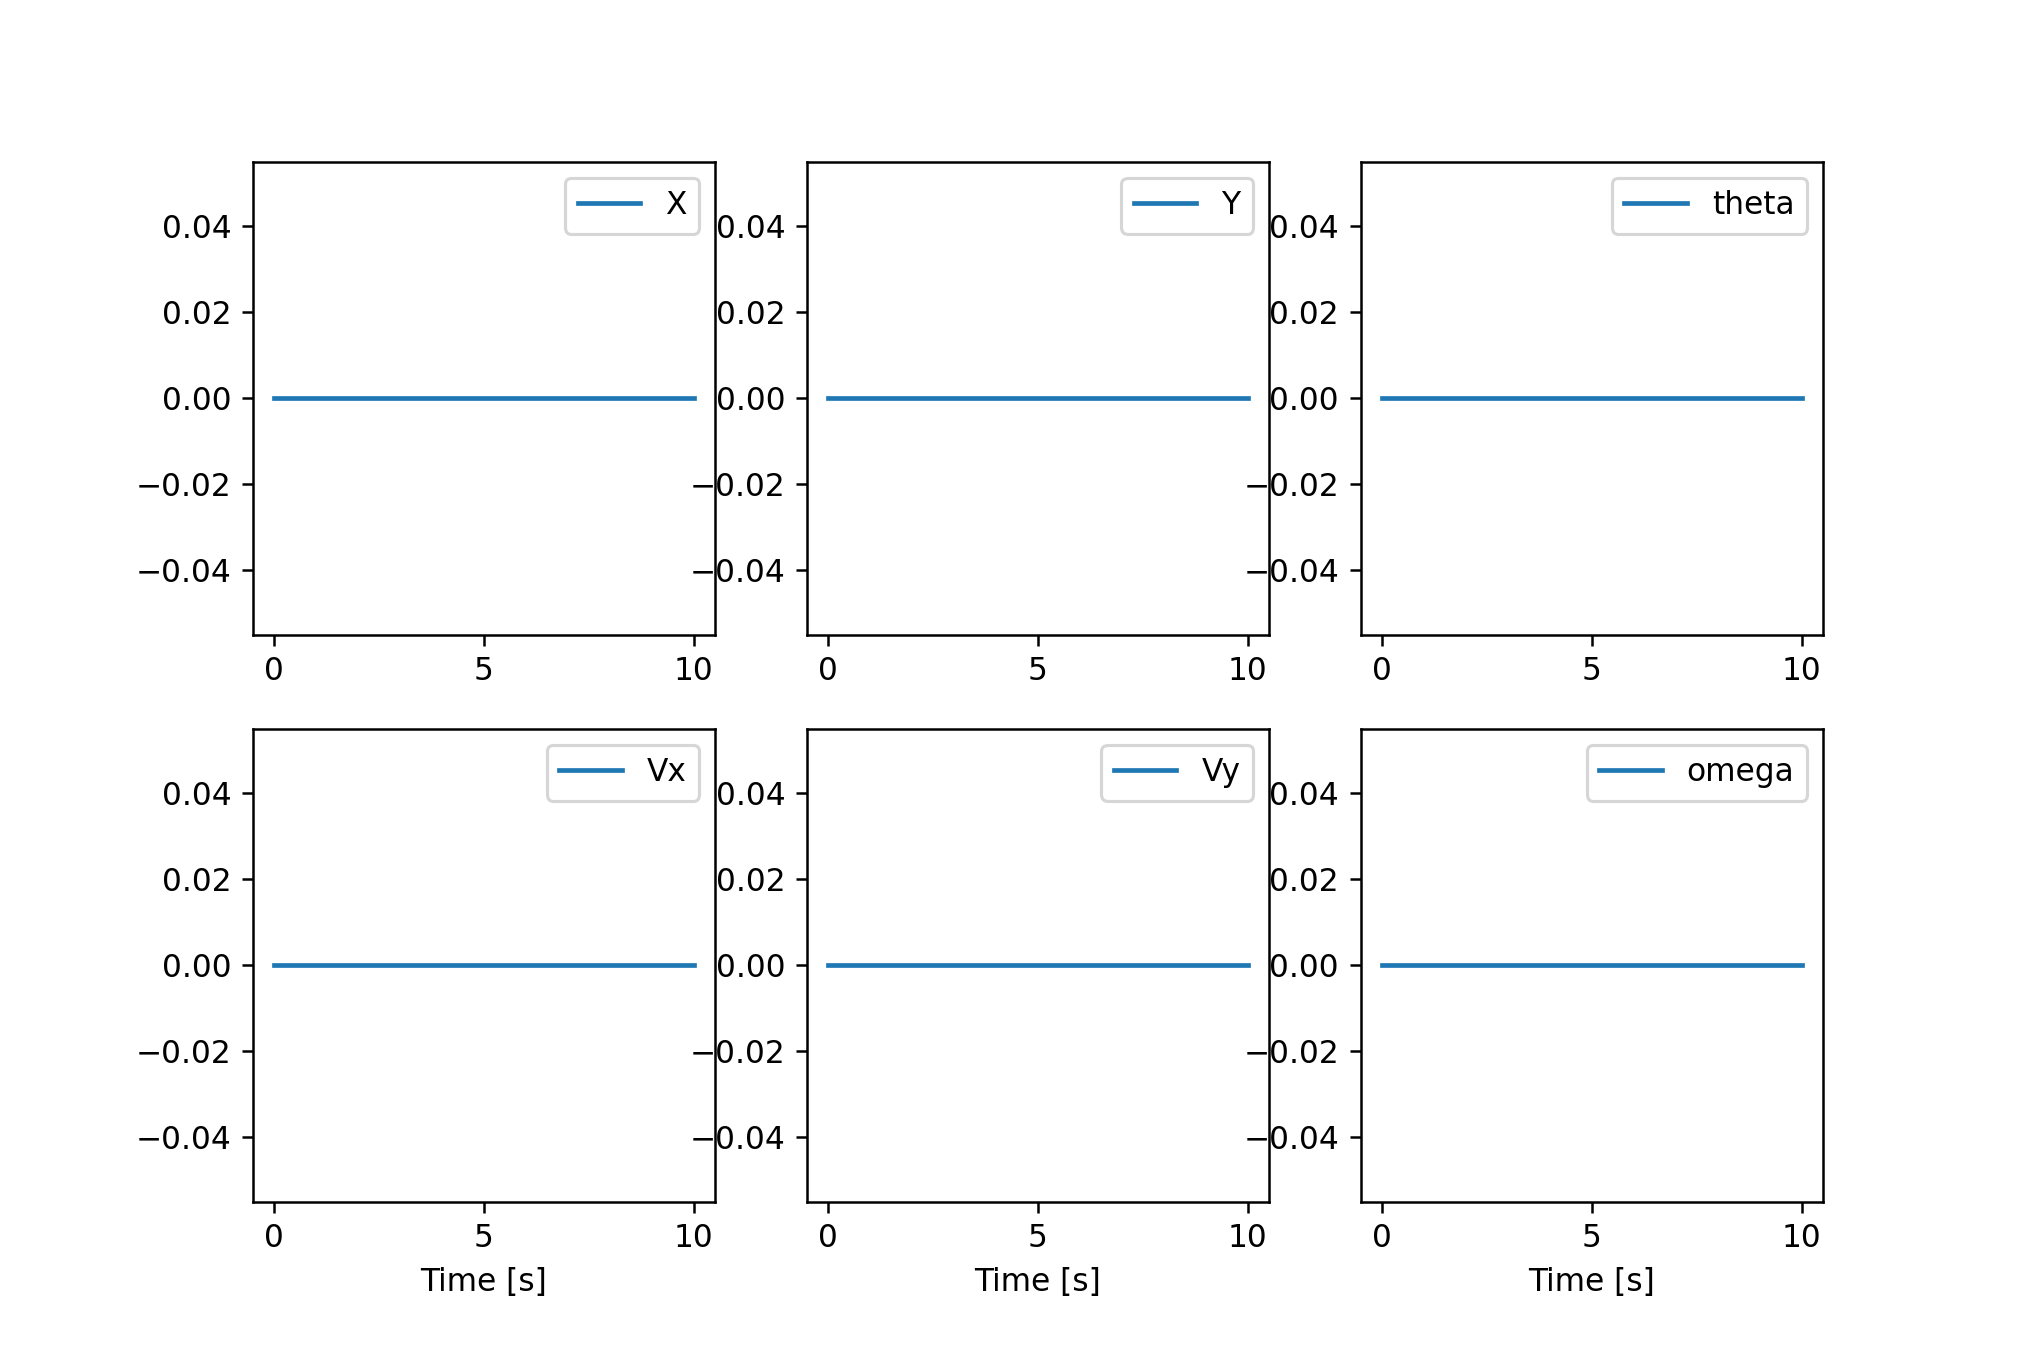

<IPython.core.display.Javascript object>


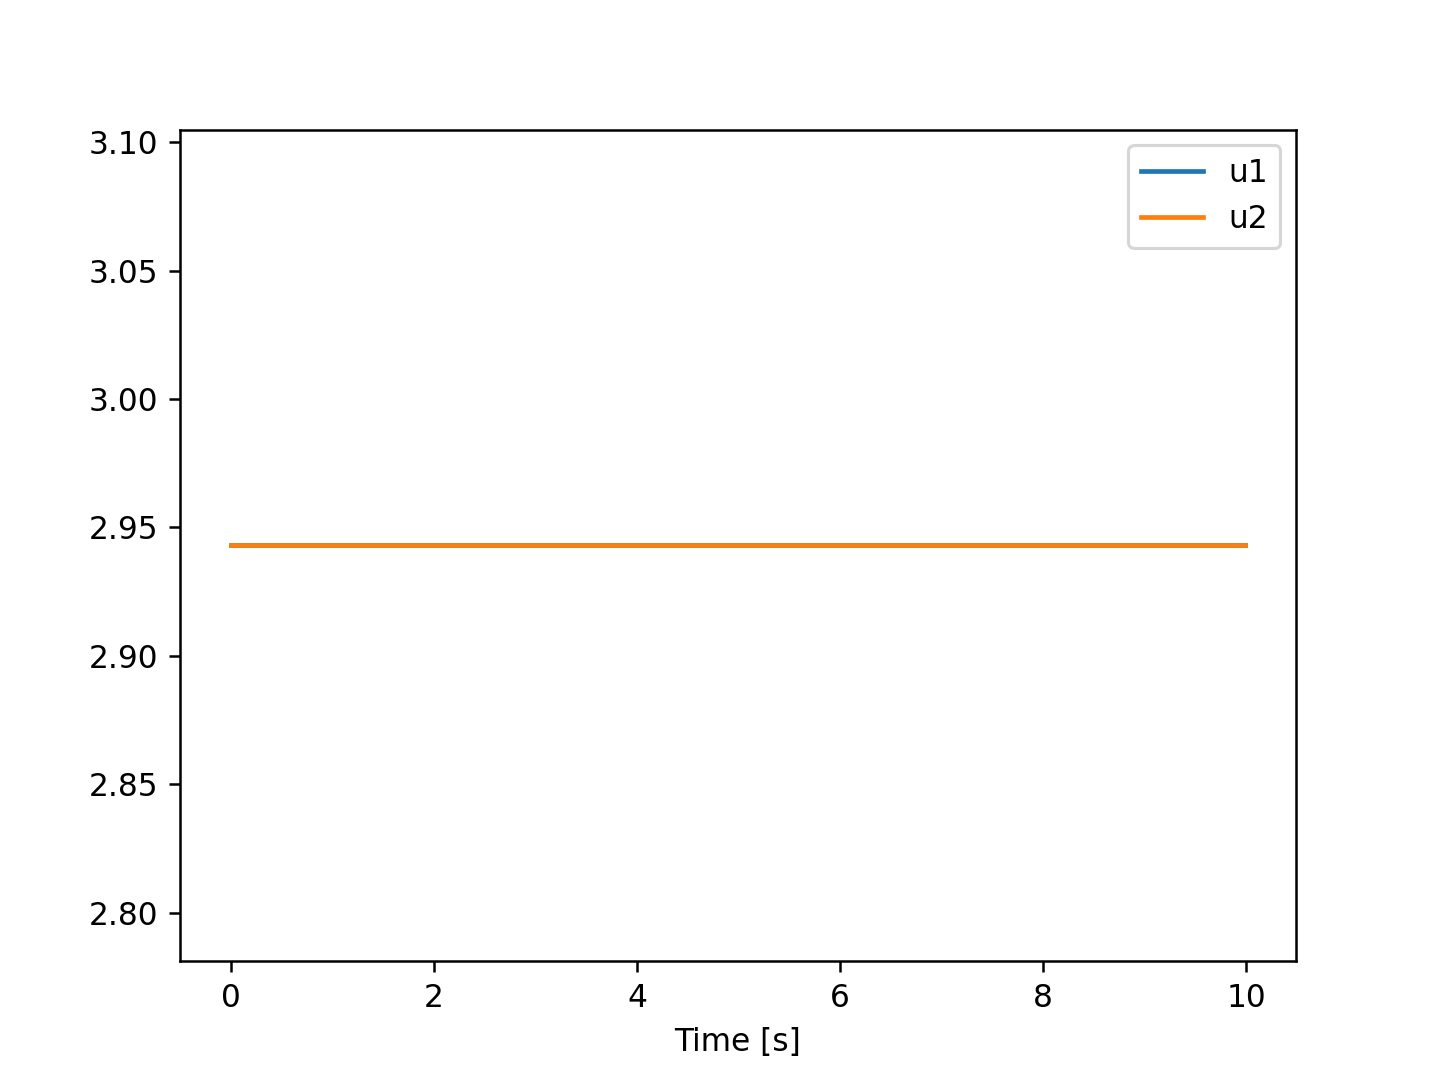

Text(0.5, 0, 'Time [s]')

In [5]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [6]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAI8JtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ExFliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpnP+1zdfT4CE1/7/D+MVytE3Jo844RwHPES4Q
8guy3QSV+MY/m/cAflfJcF9ztaJ2dgJmuxrBusupZObhCCgB1GAtXRTnnmL/zqQ06Ievjo3Dq2is
qTWvuY21n9P9d7r4Tv4SNkcb3QLJoQ9oZLeP/mZgeDcwDmtsSa88a6KwuA1lJYLVhWhNV4N450oZ
HgTZu1ZHqq/eoQ3FTKjyJkU3hsJXiyDvJVN8K/5DVbCsPtMSQDVEEkBty4dVj/wKv2DXJPnkk2KX
Y/8s1pdhQhDDd1u4DQA+TxccshQEoX3tkA2wXtoZjADHn+VdnhV6GhTjFwTxGGUsUzhymn534qei
3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIyIj19eUDlFyFtw3pyekKDi08JBBRD
MRi4zDlNLAUGix5NKFUO9Qbweox4ieU2dJzfl2Dqpd2M/sS5ruFrOWGZNNzRVL1mhhG/A8Uvi1+5
jTo3iINRmMhBuDtTvSxRFQcYTEONjUY4/5Zod+2K6jCJjbBlzbNkFsk3og8YD4KF4x8Mm93U0s4Q
/SjNdjDTe+dmz9b2ALFvV7bfP+9eAq/t6cluiBNQcO/jPWAAGE/X9JdgdFCzIhFEmdlAc97mVAuW
GTtkmwRgjNJUyUl56T5LKJK3SW6vD7BZIxTp6Tbdlj7i34474s4FzjjT4PrmIYJpjXYyjrZBJG4j
I4+ulIcvUyz+v5PrwTmGtvjHL31uRXZfMiwPmEptfzf1/khGJ3m+OsVBit8SxTlgWwzKmKvE+7+L
3/HdAQo7vNsEBuiGkOdGrHaIMdIbtFBaYuddBqj224qhf34Nx90cJxssBJTlpw/4lG2K1ZTg/d8H
AAAdY5qI7V+PIAACSt9nVAmbDQAsVfIbVSfR0SAsg19XfZirtNoFFdNBAoETPnlMN3AgXdS+iEyA
8G5QmaQNw5u8xVx11fF6J8RWwOxT02f8xQP1HU4T9s6Q0YkGPh/2daZsILKmNqM/Najyp4b6sfSq
VvIarvv71kBygYF6kDRqzx6JbPIuTzf7BUcOUl7+ICP8HAFFKRRTsxN9CwqxFfEpdKD2IT5ZJMJz
Iz9huce8O+D+wFxD9UxTM+tSL2LlfKOZVUY8UIu0UIO65CNyGAMA7Ov+xdxAPpIMuhg9TL7kcVNn
ybARUVfxlm7RPGYBfx51ueyEE7nQV1mg0UnD7AZ5YOPnTN4Aph8vCZiE/yi9Ief0foHrKc3OFtvR
Cx+1lkKpnra1t26XYrabD9jZrN4Vzuhx3wCqSxZmDY5QP35/mtvOIa3t2Y5jenxG61Q0FG3MpPij
n+hrAE5k4FPjR014Sr3SP4i7tEiZiwu3fZq9pJjIOo25NEpDRJp7bmw5RtLKu/YefqWD79ZCJnJ3
LGU9k8fKGwehdSYBZqcj1jBW9W8+wIPr54HkkQ1eutuV+kBzXrl/dRkMn26SRQ/svpYQ3GyO/s81
xCbpqTrPZrWZ898yb887QEWoRXod2mNidC444OrdLj5qT5DbeaBswXp8je1Vk9yhGOSCT8iND7js
AEAEGajE28RDo1lDlrkSOnFZqt1/zoPQCeUVNo20nPmnkbvnL63z6nzGXarlQuorDphazZkNzcWg
JqMp3S1urgxL9rYA+01fABhJ68E24QspWgibU+1XxGwxKogI8NumCUtn82gzVgAE8EUrM/HcYXRM
99LZL31g1QsdiV+LWaRnve9q8ylDkAKrSF/dEsuA2DRUGxxw4TK9BPifRhorHswMDsCUb9VFk6/I
id5onlOxreMyQYnn2P15rDhCrzk7FXtdf+7itandss75LGn8hgopnaVRpRhRFtkvB3pQ04Np0+XM
KWheoXotNo0y/CDIyxiKB

<IPython.core.display.Javascript object>


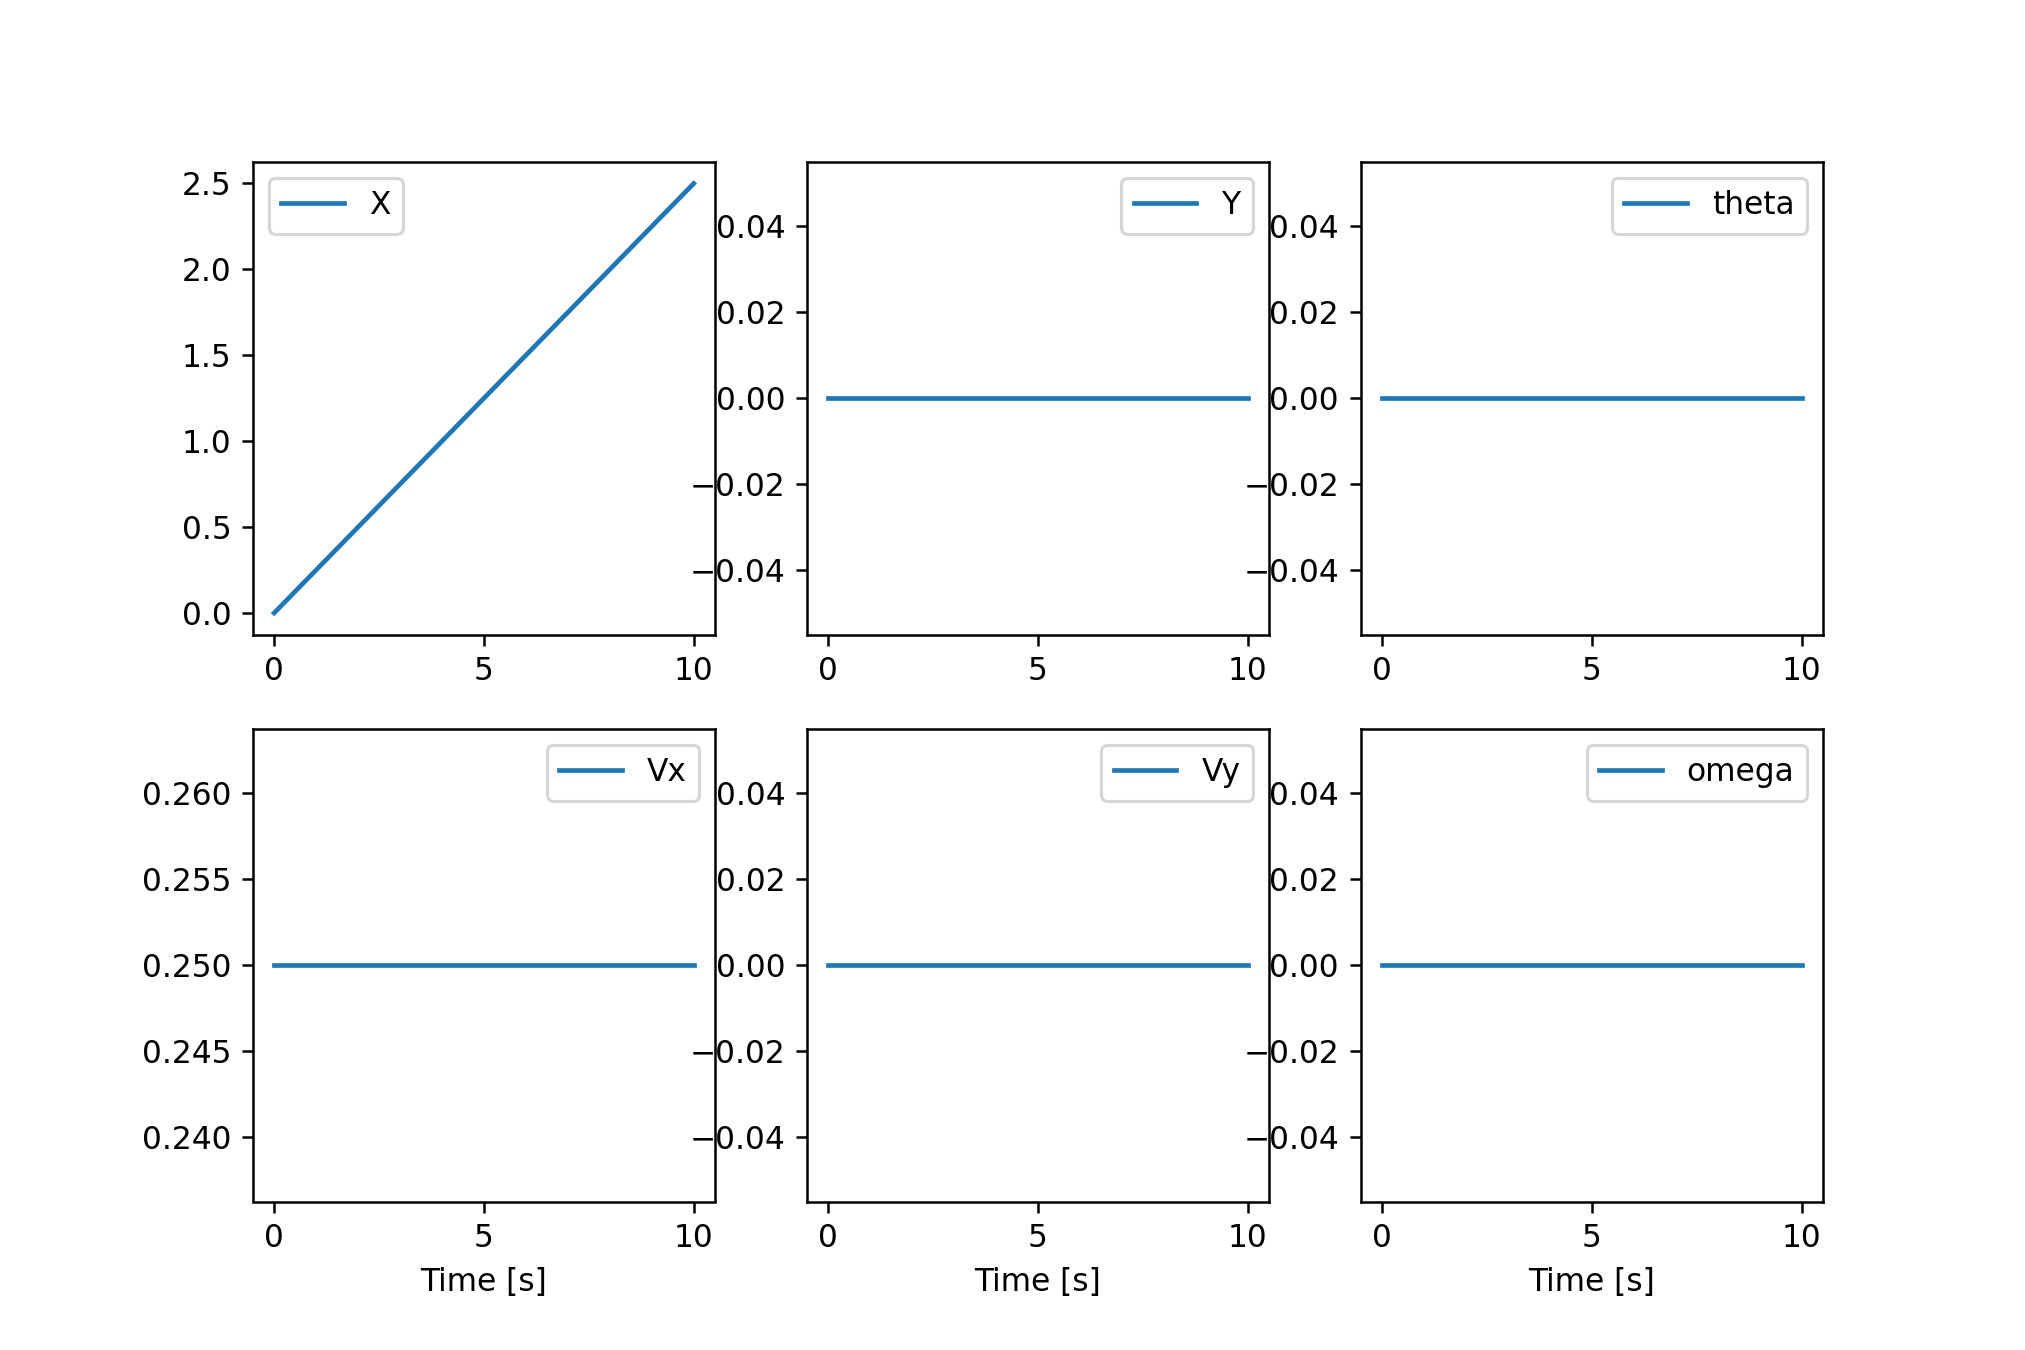

<IPython.core.display.Javascript object>


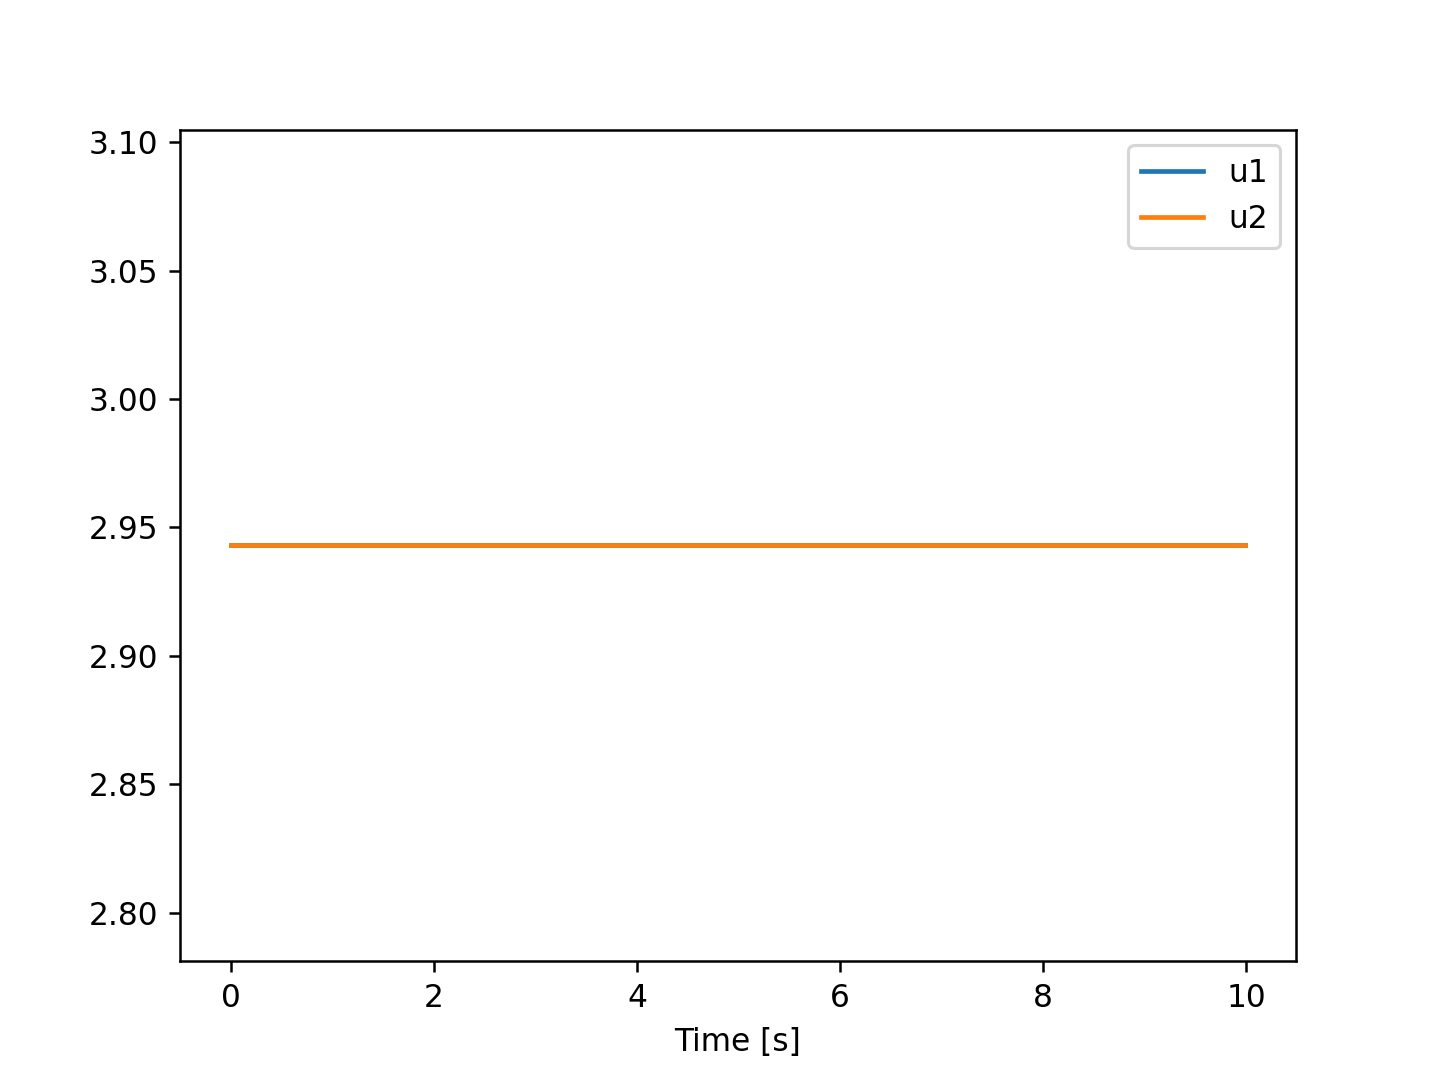

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAANwJtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ErBliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpnP+1zdfT4CE1/7/D+MVytE3Jo844RwHPES4Q
8guy3QSV+MY/m/cAflfJcF9ztaJ2dgJmuxrBusupZObhCCgB1GAtXRTnnmL/zqQ06Ievjo3Dq2is
qTWvuY21n9P9d7r4Tv4SNkcb3QLJoQ9oZLeP/mZgeDcwDmtsSa88a6KwuA1lJYLVhWhNV4N450oZ
HgTZu1ZHqq/eoQ3FTKjyJkU3hsJXiyDvJVN8K/5DVbCsPtMSQDVEEkBty4dVj/wKv2DXJPnkk2KX
Y/8s1pdhQhDDd1u4DQA+TxccshQEoX3tkA2wXtoZjADHn+VdnhV6GhTjFwTxGGUsUzhymn534qei
3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIyIj19eUDlFyFtw3pyekKDi08JBBRD
MRi4zDlNLAUGix5NKFUO9Qbweox4ieU2dJzfl2Dqpd2M/sS5ruFrOWGZNNzRVL1mhhG/A8Uvi1+5
jTo3iINRmMhBuDtTvSxRFQcYTEONjUY4/5Zod+2K6jCJjbBlzbNkFsk3og8YD4KF4x8Mm93U0s4Q
/SjNdjDTe+dmz9b2ALFvV7bfP+9eAq/t6cluiBNQcO/jPWAAGE/X9JdgdFCzIhFEmdlAc97mVAuW
GTtkmwRgjNJUyUl56T5LKJK3SW6vD7BZIxTp6Tbdlj7i34474s4FzjjT4PrmIYJpjXYyjrZBJG4j
I4+ulIcvUyz+v5PrwTmGtvjHL31uRXZfMiwPmEptfzf1/khGJ3m+OsVBit8SxTlgWwzKmKvE+7+L
3/HdAQo7vNsEBuiGkOdGrHaIMdIbtFBaYuddBqj3I3am17b5INHC4bRe1AwZsxocjdLb9VwfvSDg
AAOsc/kdq/PkAABJW+4agTNpoAWKvktQhXz8dtEZmurpo0s9rO/7jLnZqVs+zb0xHbGHFbxd9Q+H
iJmJnkoWjwVanguZEV32OetUFXvxRbkF1zsOzuHADUC4wzYASXOnWDl/ArmS6XYf9b+AaASqIzyY
ZPkb6qr758eUs2B8KsIh1v/qQb2uPc8RjibyiSn+u56a6foGQ1DXCDb+5hwkRAeEZJLhJFTlPB50
Y2VzMtTtkabb0Kl1l3DoB6pjEfTI9LPFiX/xSR6ud/yeRUvL8SScJ4BRndq4SAAOVvvINnwC0PKp
qj/l2wm4j3vEbC0YqlO1nSnq/LB11lUVQHzAD7eoweTZS0iC1jn58JppdFpTYtNlE29ELJ0QxdOj
QXD2vjZRRwd9s16l2rCGqqK8a0XnkQAxf3mpI9IW2gECtq940YDHKiTRGWDVo9NYixJptYHKyv3D
d/PoY/viLaZQdc1vWAyWCnlo7uV3nrTqy30joE36j97H3jyb9yt1Rni5zdhTJgCV0rfzZeCehYdq
VLgGXceOG8yyf9H3QDkyGaRCdfD7maOCZ3bhbXHOk3n5DarBe+XdjndS2/Y3qG013VdnXxb6u/Qn
e/UhH5/+gRpksvVW23cBdmKZMyKViukppxUfyysMry7oALZaqsXmeeufCadz32FMnsN16quUMzfW
RM4FwFxWmvKUAaaagGXUS2FlYog7KbvNLB+JnNyAhsDHj8ng4n9kGddBAUhbs1HJZoWnjth3gpqj
pYz5oIW1wvORUvd+u9G3GIqJz0sHO61hiKYTuM24aQd9BOmGbTBLlGlmEwPhrmD4zyxVhT2EOUBc
lEpYd7d1s10B7Lpco4HH1+RE7vG1VXsV4WZIMTz7HyrOUqq3R3D4H35P/bfm7DGjoPQXLML+rjN4
hQYolqo+7jYaN6oRii1U2+HQcSVi2jTgPGbUTz54hESAvAz51/OQK8ABWgPN/R5iiFdUnQGtb8WI
klpiAAEhjRfa5qCaGDvZe

In [7]:
# Verify Part1 question 3, we can use the same controller 
# If we give the dron a non-zero velocity in the x-direction at the begining, it will move in the direction and keep theta = 0.
z0[1] = 0.25
t, state, u = quadrotor.simulate(z0, part1_q2_controller, horizon_length, disturbance = False)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

# now we can also create an animation
quadrotor.animate_robot(state, u)

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

In [8]:
def get_linearization(z, u):
    theta = z[4]
    dt = quadrotor.DELTA_T
    drone_mass = quadrotor.MASS
    drone_length = quadrotor.LENGTH
    drone_inertia = quadrotor.INERTIA
    
    A_mat = np.array([[1,dt,0,0,0,0],
                      [0,1,0,0,dt * -((u[0] + u[1]) * np.cos(theta) / drone_mass),0],
                      [0,0,1,dt,0,0],
                      [0,0,0,1,dt * -((u[0] + u[1]) * np.sin(theta) / drone_mass),0],
                      [0,0,0,0,1,dt],
                      [0,0,0,0,0,1]])
    
    B_mat = np.array([[0,0],
                      [dt * (-np.sin(theta) / drone_mass), dt * (-np.sin(theta) / drone_mass)],
                      [0,0],
                      [dt * (np.cos(theta) / drone_mass), dt * (np.cos(theta) / drone_mass)],
                      [0,0],
                      [dt * drone_length / drone_inertia, -dt * drone_length / drone_inertia]])
    return A_mat, B_mat

#Solve the LQR Problem
def solve_LQR(A, B, Q, R, QN, N):
    list_of_P = []
    list_of_K = []

    list_of_P.append(QN)

    for i in range(N):
        K_i = -1 * np.linalg.inv(B.transpose().dot(list_of_P[i]).dot(B) + R).dot(B.transpose()).dot(list_of_P[i]).dot(A)
        P_i = Q + A.transpose().dot(list_of_P[i]).dot(A) + A.transpose().dot(list_of_P[i]).dot(B).dot(K_i)
        list_of_K.append(K_i)
        list_of_P.append(P_i)

    return list_of_P[::-1], list_of_K[::-1]
    

#Sovle infinite LQR for question 3 & 4
def get_part2_controller(z_star, u_star):
    # First we need to design the quadratic cost matrix Q and R
    Q_mat = 1000. * np.eye(6)
    R_mat = 1 * np.eye(2)
    
    # Then get A and B by linearization
    A, B = get_linearization(z_star, u_star)
    print ("A mat is: ", A)
    print ("B mat is: ", B)
    
    horizon_length = 1000
    P_mats, K_mats = solve_LQR(A, B, Q_mat, R_mat, Q_mat, 1000)
#     P = P_mats[0]
#     K_mat = K_mats[0]
    
    return K_mats
    
z_original = np.zeros([quadrotor.NUMBER_STATES,])
u_original = 0.5 * quadrotor.MASS * quadrotor.GRAVITY * np.ones([2,])
part2_K_mats = get_part2_controller(z_original, u_original)

# we can simulate the robot but we need to provide a controller of the following form
def part2_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    K = part2_K_mats[i]
    control_unit = K.dot(state - z_original) + u_original
    return control_unit



# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, part2_controller, horizon_length, disturbance = False)

A mat is:  [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.     -0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B mat is:  [[ 0.          0.        ]
 [-0.         -0.        ]
 [ 0.          0.        ]
 [ 0.01666667  0.01666667]
 [ 0.          0.        ]
 [ 0.01333333 -0.01333333]]


<IPython.core.display.Javascript object>


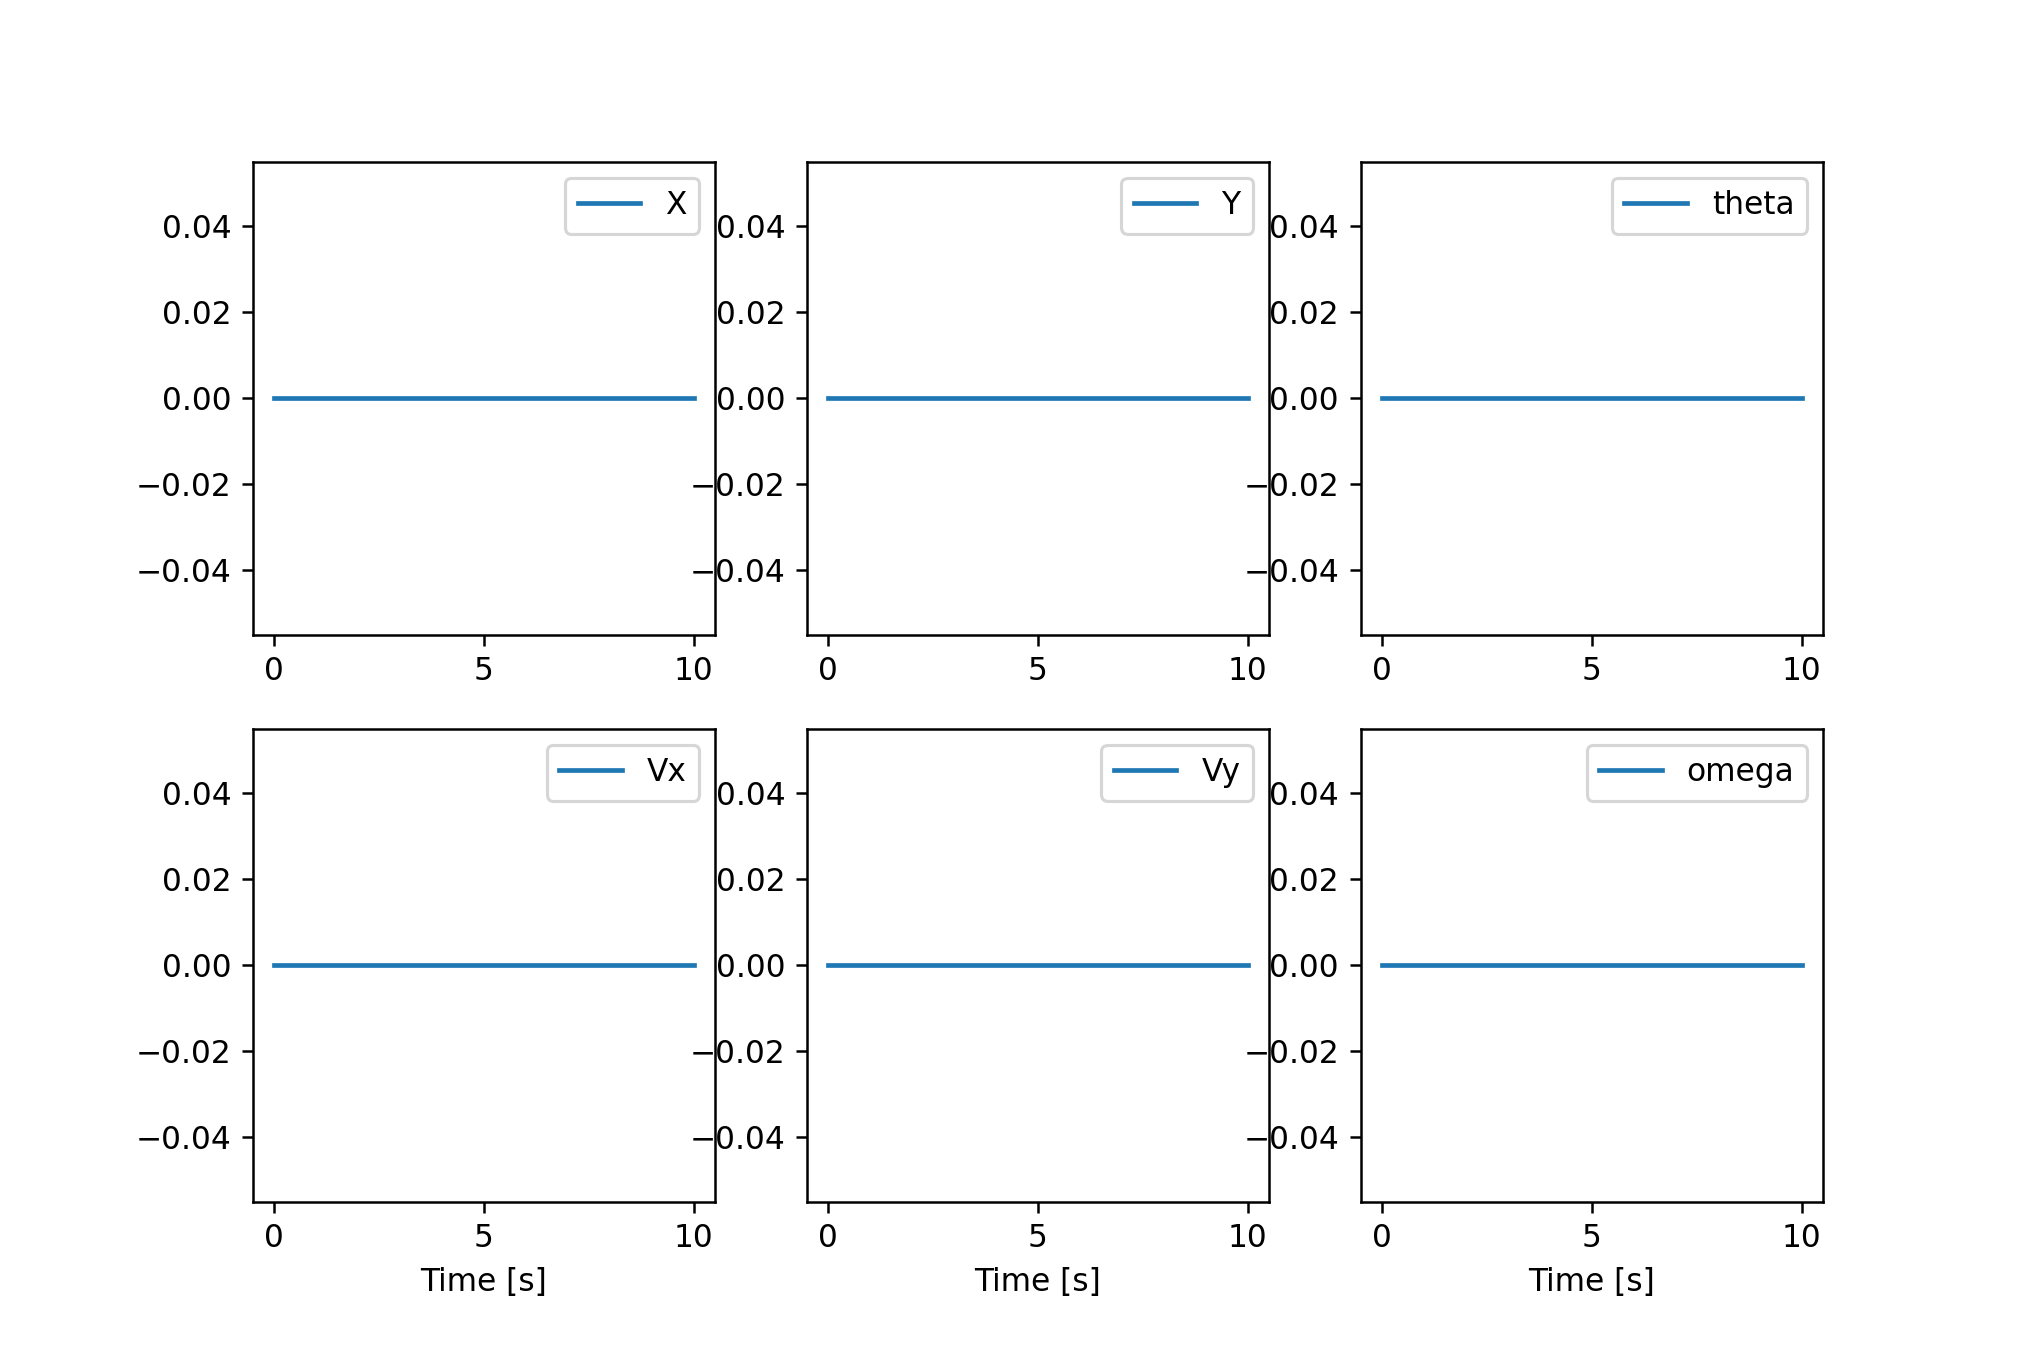

<IPython.core.display.Javascript object>


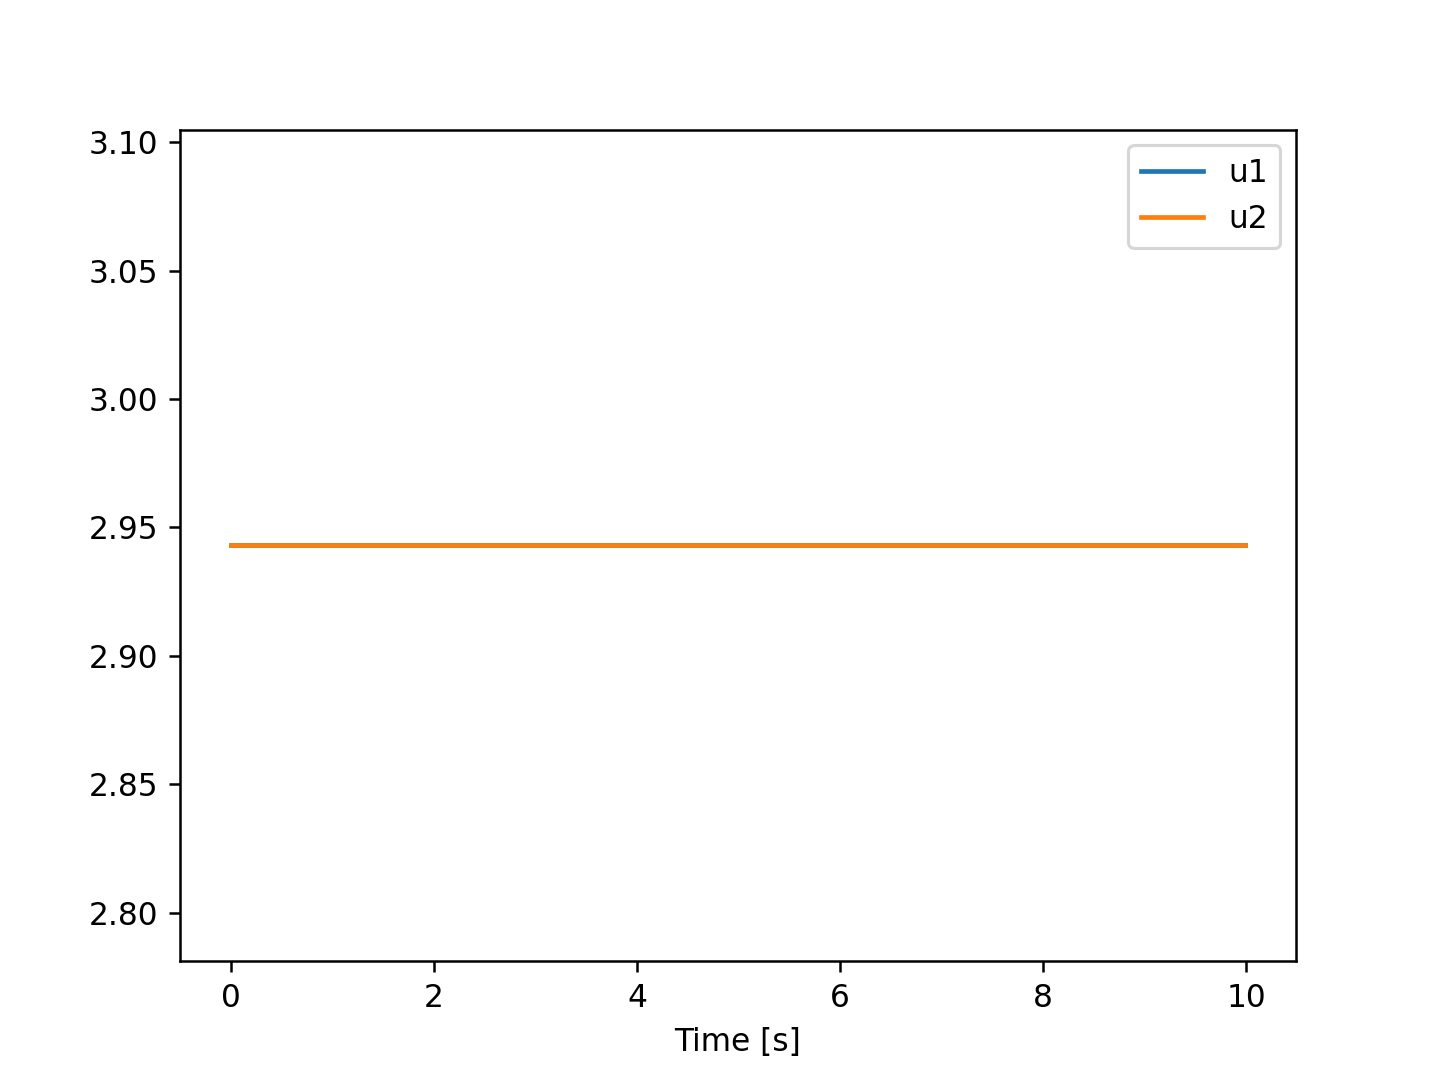

Text(0.5, 0, 'Time [s]')

In [9]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')


In [10]:
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAI8JtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ExFliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpnP+1zdfT4CE1/7/D+MVytE3Jo844RwHPES4Q
8guy3QSV+MY/m/cAflfJcF9ztaJ2dgJmuxrBusupZObhCCgB1GAtXRTnnmL/zqQ06Ievjo3Dq2is
qTWvuY21n9P9d7r4Tv4SNkcb3QLJoQ9oZLeP/mZgeDcwDmtsSa88a6KwuA1lJYLVhWhNV4N450oZ
HgTZu1ZHqq/eoQ3FTKjyJkU3hsJXiyDvJVN8K/5DVbCsPtMSQDVEEkBty4dVj/wKv2DXJPnkk2KX
Y/8s1pdhQhDDd1u4DQA+TxccshQEoX3tkA2wXtoZjADHn+VdnhV6GhTjFwTxGGUsUzhymn534qei
3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIyIj19eUDlFyFtw3pyekKDi08JBBRD
MRi4zDlNLAUGix5NKFUO9Qbweox4ieU2dJzfl2Dqpd2M/sS5ruFrOWGZNNzRVL1mhhG/A8Uvi1+5
jTo3iINRmMhBuDtTvSxRFQcYTEONjUY4/5Zod+2K6jCJjbBlzbNkFsk3og8YD4KF4x8Mm93U0s4Q
/SjNdjDTe+dmz9b2ALFvV7bfP+9eAq/t6cluiBNQcO/jPWAAGE/X9JdgdFCzIhFEmdlAc97mVAuW
GTtkmwRgjNJUyUl56T5LKJK3SW6vD7BZIxTp6Tbdlj7i34474s4FzjjT4PrmIYJpjXYyjrZBJG4j
I4+ulIcvUyz+v5PrwTmGtvjHL31uRXZfMiwPmEptfzf1/khGJ3m+OsVBit8SxTlgWwzKmKvE+7+L
3/HdAQo7vNsEBuiGkOdGrHaIMdIbtFBaYuddBqj224qhf34Nx90cJxssBJTlpw/4lG2K1ZTg/d8H
AAAdY5qI7V+PIAACSt9nVAmbDQAsVfIbVSfR0SAsg19XfZirtNoFFdNBAoETPnlMN3AgXdS+iEyA
8G5QmaQNw5u8xVx11fF6J8RWwOxT02f8xQP1HU4T9s6Q0YkGPh/2daZsILKmNqM/Najyp4b6sfSq
VvIarvv71kBygYF6kDRqzx6JbPIuTzf7BUcOUl7+ICP8HAFFKRRTsxN9CwqxFfEpdKD2IT5ZJMJz
Iz9huce8O+D+wFxD9UxTM+tSL2LlfKOZVUY8UIu0UIO65CNyGAMA7Ov+xdxAPpIMuhg9TL7kcVNn
ybARUVfxlm7RPGYBfx51ueyEE7nQV1mg0UnD7AZ5YOPnTN4Aph8vCZiE/yi9Ief0foHrKc3OFtvR
Cx+1lkKpnra1t26XYrabD9jZrN4Vzuhx3wCqSxZmDY5QP35/mtvOIa3t2Y5jenxG61Q0FG3MpPij
n+hrAE5k4FPjR014Sr3SP4i7tEiZiwu3fZq9pJjIOo25NEpDRJp7bmw5RtLKu/YefqWD79ZCJnJ3
LGU9k8fKGwehdSYBZqcj1jBW9W8+wIPr54HkkQ1eutuV+kBzXrl/dRkMn26SRQ/svpYQ3GyO/s81
xCbpqTrPZrWZ898yb887QEWoRXod2mNidC444OrdLj5qT5DbeaBswXp8je1Vk9yhGOSCT8iND7js
AEAEGajE28RDo1lDlrkSOnFZqt1/zoPQCeUVNo20nPmnkbvnL63z6nzGXarlQuorDphazZkNzcWg
JqMp3S1urgxL9rYA+01fABhJ68E24QspWgibU+1XxGwxKogI8NumCUtn82gzVgAE8EUrM/HcYXRM
99LZL31g1QsdiV+LWaRnve9q8ylDkAKrSF/dEsuA2DRUGxxw4TK9BPifRhorHswMDsCUb9VFk6/I
id5onlOxreMyQYnn2P15rDhCrzk7FXtdf+7itandss75LGn8hgopnaVRpRhRFtkvB3pQ04Np0+XM
KWheoXotNo0y/CDIyxiKB

<IPython.core.display.Javascript object>


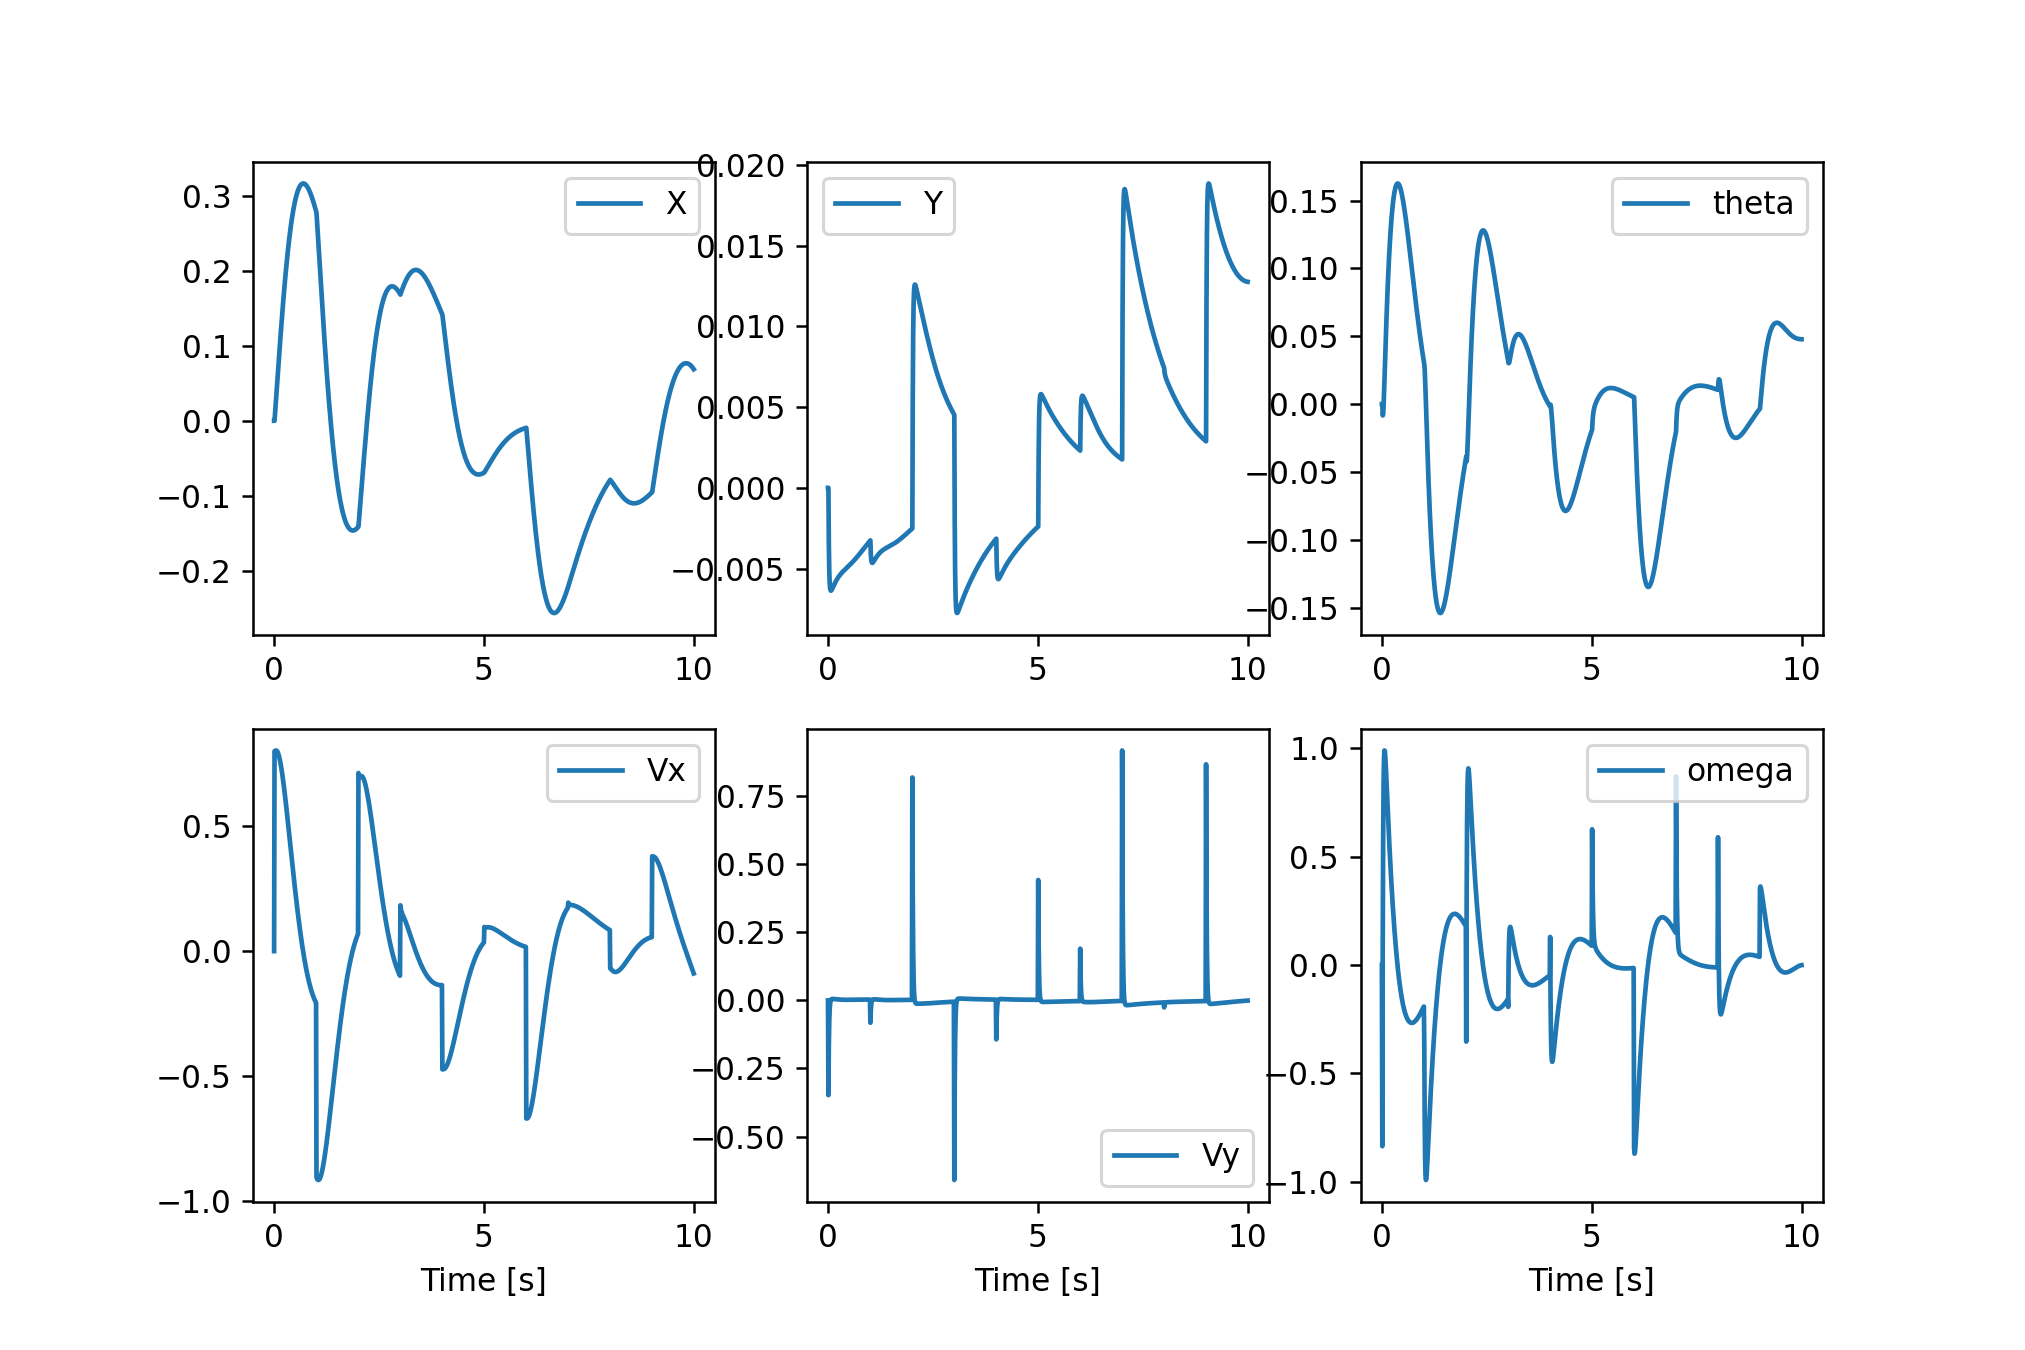

<IPython.core.display.Javascript object>


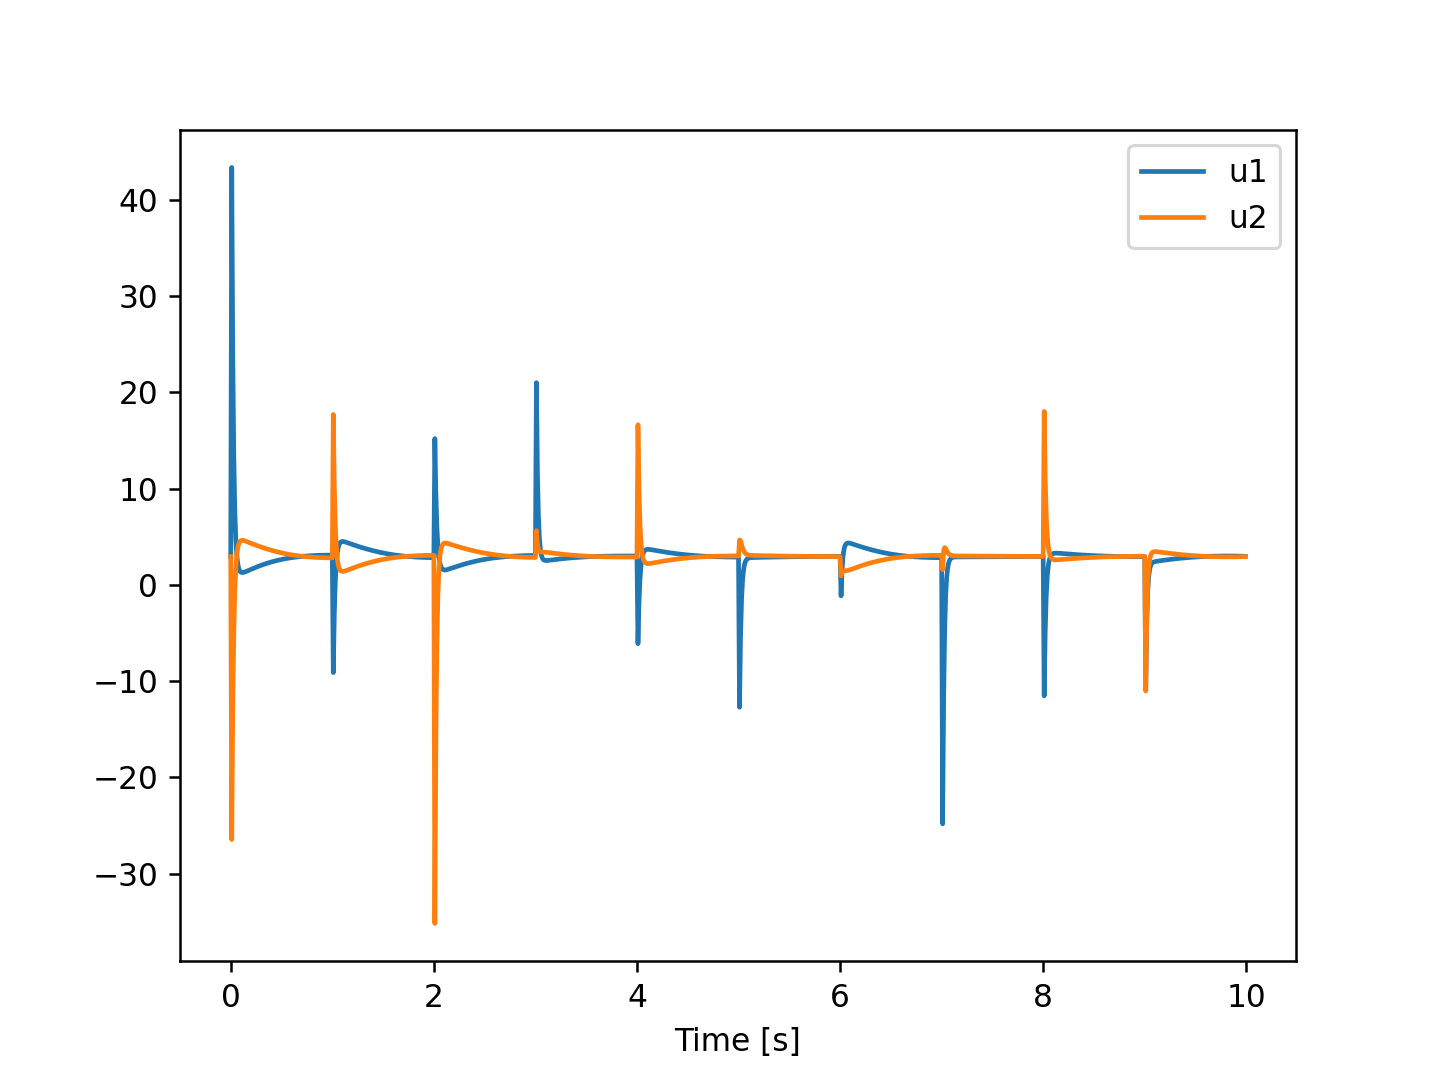

Text(0.5, 0, 'Time [s]')

In [11]:
t, state, u = quadrotor.simulate(z0, part2_controller, horizon_length, disturbance = True)
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')


In [12]:
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAYO1tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EhRliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhmedEfUwaAQY0NNeI9N/r8O7WKv1d/gCdaAl
3Gi81o3z2y10tRWcIK0jjKBVUuThZ+QsHL0juuKYsYerxwqtDlxCDeItdrlLIe68DWXvwKOyDYHE
ScRYU8BCVbYG+CUL9LfBvAFLdMKsx8aFL0gHYcZ1oT+thVmulCoT81aUdXAvNWxJVeFoyHDIqUgd
hcLMjnuFJjpeTkAmyryQvcvS4V4TvwAHwmECX9e+JQ9/0Z+WAeGTsSiZtFgsgBlgUQBbpCIj0eR3
Drxa5PEex3LDD+XAg9NDsxW8cce2l/FR02IVTJaZmpZXtWQ5f3BP8Aty1kv38ceulQsVhdJje6g0
l0Bj6XmjYBLS5p2thXBovCDk56tcwW0pXAmn5ff2hXXmI5Gvc0rDaU9hZI3FzDNi13TNYmkSDf1S
KznomzDwO9GxtcvmIrqffe+QXHegiGfM63XtT7KB/QMexVdErDPgyaKkGf8V+NqvN+yY8/nsjf2E
Fx2m8yY4A20h/nzvxj0JGMLeHi7wr4sf7PBrPmO4yae5/KjSNEhiaznU538Udp/VNSV+3gxYuD9n
ZArTtqPvt4yLz39rF9EoPALtRWEN4d39oavGiY9uez7KFHOitwSyakb+PI3wpb5hosaHKRZsInzk
9Cff7PchFzeLIr7egISomBC9Ve2/Xsxynmmd1ENTAAADAAADAAADAAAE/htllAK04JF28bQCOngz
pQuNUKyt4D5BwwOk5Ie/w8MbGGo+4umc/7XN4xPgITX/v8P4xXK0cnPq8a36oAR/JNEM4+TBapX4
xj+b9wB+V8lwT3O2o56ISGYx3hiQiFC9I9bUAh+/4OliOWN8L6C7/VdZh6DY4QvaPAlCFTRG93VG
QdhJRQP/nWUaBT+q9NwS1xkVOEO5VE3j/5mYHg3MA7ERhmvAovQIhQIO2WQ0ZYKQmfQn8c6UMjwJ
s3aF94dpuhgNv05p8iZFN4bCV4sg4WZXfaTSQ1PNAL7TEkA1RBJAbRyVb3/8isQBpIT5oiDriXZK
Mf9SOmf57XmzKVEgHydyGAYiwNOAu2QDbDC2hmMAMef5U2T78u+ycS1SNKFJjMqZD01HIEL8A1gA
AAMAAAMAAAMAAAMAyDbHPTOu5UOUXIW3DenJ6QoPh8mkEFEMxGLjMOWMsBQaLHk0oVP9VylD1GgC
JwmzpOb8uwdVLv8ZlDL3raej2uyfQ+jK0F71qp+gbS+PBobfnjTzDNjlirXRXEqCT02CgX0WWUuZ
GTlDOLcp5XHgPkxhExtgqbXQCC2Sb0I04tgPgral+tXljut0JQ7N1xryPvM5Np7pwLjgXDTkIUB1
gg4qaqBXw7jbk4kVucDNwu1upiuE5VA0YyRpMTS9MLnLHssfAn2U/eHGcaGVfuAydjKq7dSECU+N
+9MzT88k4KMdckeSeIr793DafGVldB+2Wb52UBz32P9a1zZA1cIpxfFbIZj0aI9jwMRgBf4AQrrU
UQtqsfnw3N9TCSNABhWeGDs/yTENMjKTGiZW+K35Xnf9DtkJw7jKIYISCAx6P5toEIXzOCVtqMJ0
kvJ7vnbYKHs39qN08KAPTCLgCRlDl78LfN5Es3worm8E9vR/rFqNoQHQST2AAAADAAADAAJLy7mG
RkjXFe992pBjLn2awz4tU4cEjGgsml+ZiWSjKMHe2AWE1rxfblNl5/QS/EAha2atw29W3t5KrWc8
aS1MdypOjPmJal44WP5OKwd+kLOlVhyyy/Gaz4xvKI9igKHXviW8Anuey14Sz/XbsD1NuoYahrZH
Rq+1AZw44Gl2pwLZsy83T15/UQxWha1Z/PP0p8qsddH0IGHQqZb9E9oqvkMAYB1Rb9LuX2qZAr0e
qh5ViSqk2Aioq/jLTwUWzYYTUOvxFiKytLrQ4Zwt0TO8JfhbbwGPWwFUPlHMHdmNAVKM9/UlIurP
FWVDrtX4toOzALvUfw0tR1ldpdfhQn5Y+BwPD+TsDI6zpQWgfxmsSw/BA40JyUGTvnte1QFdfsPb
U5I/wXYCSmgS4BZGx7vRhgUIGwoyeVVQkPFopBW0mN53fiZ1WlGQXRC5Xviki6cZhz+NW4Y1bFiF
he6el7UWD2PL3omLgOeF9+77wVw2ZJ5sb8a47TpT+LwNQ8TI/WPQQ8FTs3uvMYSkr853auHzfbKm
mbakLR0tqC8zZvuHC2V3bcc22+f5lQkYd6UctVADPo1Y/mP9b25AerMZ4Ob8bjL1KeptR93OMgv/
DUwpMsmsXyX+ocGUNVC3kERz0s+A4lFnr3Z0WgFhiKRHsK5OaTSP934PvAkIeoBGZO214dBqlTvV
AUQNkR/OJriT/xLkRgVYkIT99uSQOPr8iJ3d0WNMcbQVenA+r69llz9+U+cFc1Xtdf+NkCaAB2y9
G7Sex3sH4a4LQvYRXGq2BBi2PwO3WYUjes3fp9GiKB5JS42AzpJDJDT5fQJE9vtRGqKiRnNiF875
KQp9kqI0SgwEPAAJs8LrMVvlKcJznMFBoAAAAwAAE3RZ/sDbgD51R0ULQVBjsgJFD49ZuehgE4Nh
S37zy9jDsqEXNNNvaAJ6j/TPuDsI2gOiZqwYLssyJz00nG1sNjVtXmnWFcUjThg+7khsEQFGKNP0
bMdcCa2tjXIV/SXvzyPXM

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$? What might influence the results in this case?

In [20]:
time_length = 1001
deltaT = 0.01
def get_waypoints():
    waypoints_on_circle = []
    
    thetas = np.linspace(0, time_length * deltaT, 1001)
    omega = 2 * np.pi
    for i, t in enumerate(thetas):
        k = i / 1001
        z_i = np.array([np.cos(omega * k), -omega / 10 * np.sin(omega*k), np.sin(omega*k), omega / 10 * np.cos(omega*k), 0, 0])
        waypoints_on_circle.append(z_i)
        
    return waypoints_on_circle

# Get the waypoints on the circle
part3_trajectory_points = get_waypoints()

print("part3 points: ", part3_trajectory_points[0])

part3 points:  [ 1.         -0.          0.          0.62831853  0.          0.        ]


In [35]:
def solve_LQR_trajectory(A, B, Q, R, x_bar, N): 
    '''
    A, B, Q and R are the matrices defining the OC problem
    x_bar is the trajectory of desired states of size dim(x) x (N+1)
    N is the horizon length

    The function returns 1) a list of gains of length N and 2) a list of feedforward controls of length N
    '''
    K_gains = []  # K_i

    list_of_P = [Q]  # P_i and P_N

    k_feedforward = []  # k_i

    list_of_p = []  # p_i
    x_bar_N = x_bar[N]
    qN = - Q.dot(x_bar_N)
    list_of_p.append(qN)  # p_N

    for i in range(N):
        # A B order is N - 1, N - 2, ... , 0
        K_i = -1 * np.linalg.inv(R + B[i].transpose().dot(list_of_P[i]).dot(B[i])).dot(B[i].transpose()).dot(list_of_P[i]).dot(A[i])

        P_i = Q + A[i].transpose().dot(list_of_P[i]).dot(A[i]) + A[i].transpose().dot(list_of_P[i]).dot(B[i]).dot(K_i)

        k_i = -1 * np.linalg.inv(R + B[i].transpose().dot(list_of_P[i]).dot(B[i])).dot(B[i].transpose()).dot(list_of_p[i])

        x_bar_i = x_bar[ N - i - 1]
        q_i = - Q.dot(x_bar_i)
        p_i = q_i + A[i].transpose().dot(list_of_p[i]) + A[i].transpose().dot(list_of_P[i]).dot(B[i]).dot(k_i)

        K_gains.append(K_i)
        list_of_P.append(P_i)
        k_feedforward.append(k_i)
        list_of_p.append(p_i)

    return K_gains[::-1], k_feedforward[::-1]

def get_part3_controller(z_star_waypoints, u_star):
    # First we need to design the quadratic cost matrix Q and R
    Q_mat = np.array([[1000,0,0,0,0,0],
                      [0,1000,0,0,0,0],
                      [0,0,1000,0,0,0],
                      [0,0,0,1000,0,0],
                      [0,0,0,0,1000,0],
                      [0,0,0,0,0,1000]])
    R_mat = np.array([[0.1, 0],
                      [0, 0.1]])
    
    # Then get A and B by linearization
    A_mats = []
    B_mats = []
    horizon_length = time_length - 1
    
    for i in range(horizon_length):
        A, B = get_linearization(z_star_waypoints[i], u_star)
#         if i < 10:
#             print ("A mat is: ", A)
#             print ("B mat is: ", B)
        A_mats.append(A)
        B_mats.append(B)
    
    K_mats, k_feedforward_mats = solve_LQR_trajectory(A_mats[::-1], B_mats[::-1], Q_mat, R_mat, z_star_waypoints, horizon_length)
    
    return K_mats, k_feedforward_mats

z_original = np.zeros([quadrotor.NUMBER_STATES,])
balanced_force = 0.5 * quadrotor.MASS * quadrotor.GRAVITY
u_original = np.array([balanced_force, 1. * balanced_force])
part3_K_mats, part3_k_feedforward_mats = get_part3_controller(part3_trajectory_points, u_original)

def part3_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    K = part3_K_mats[i]
    k = part3_k_feedforward_mats[i]
    control_unit = K @ (state) + u_original + k
    return control_unit


# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
z0[0] = 1
t, state, u = quadrotor.simulate(z0, part3_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


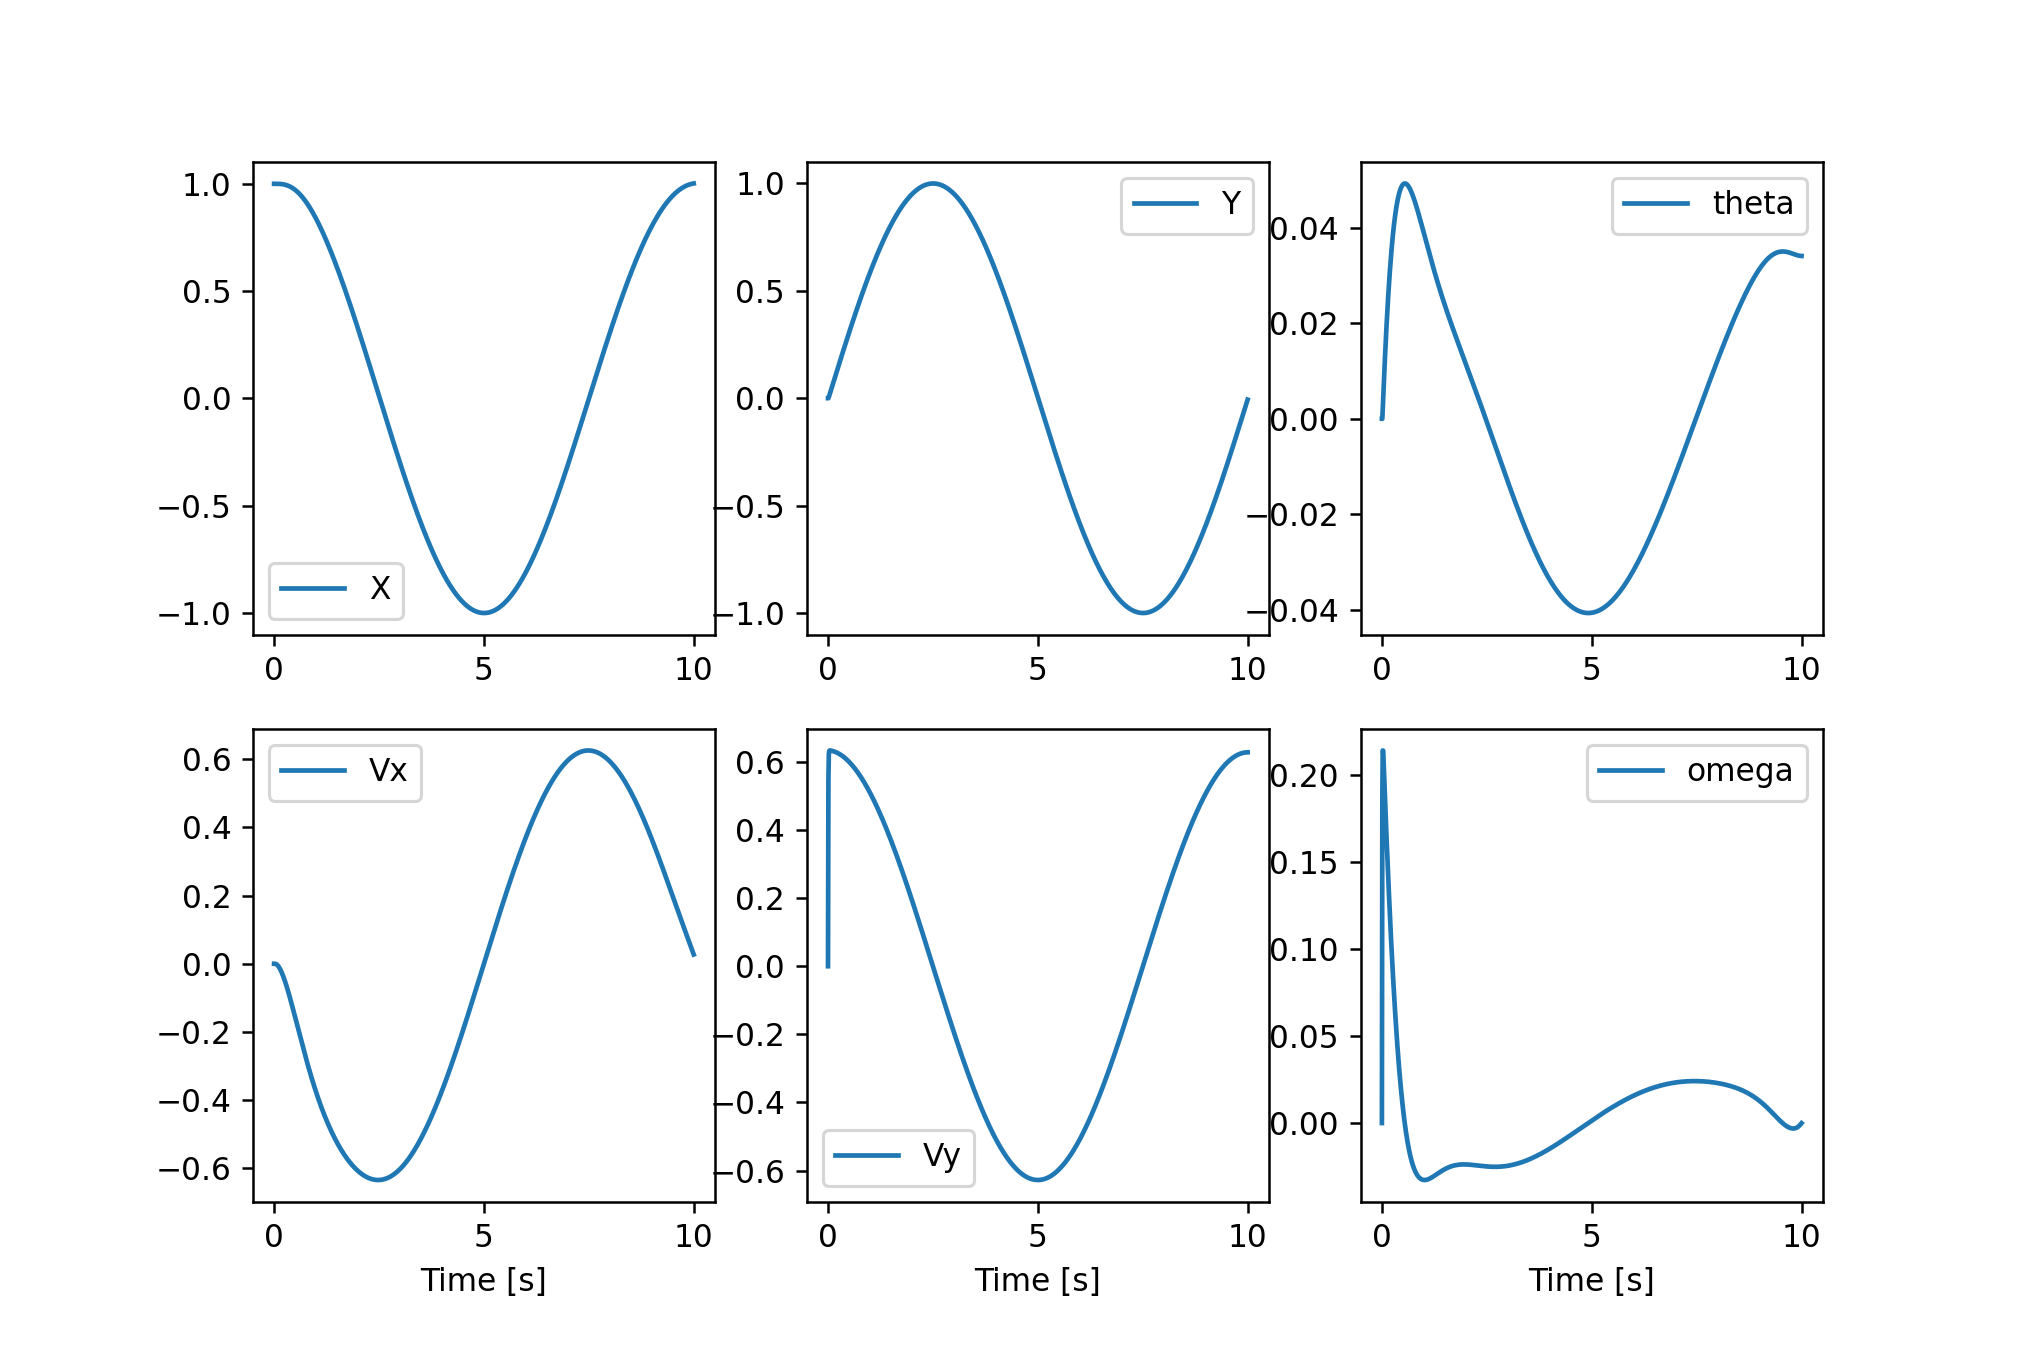

<IPython.core.display.Javascript object>


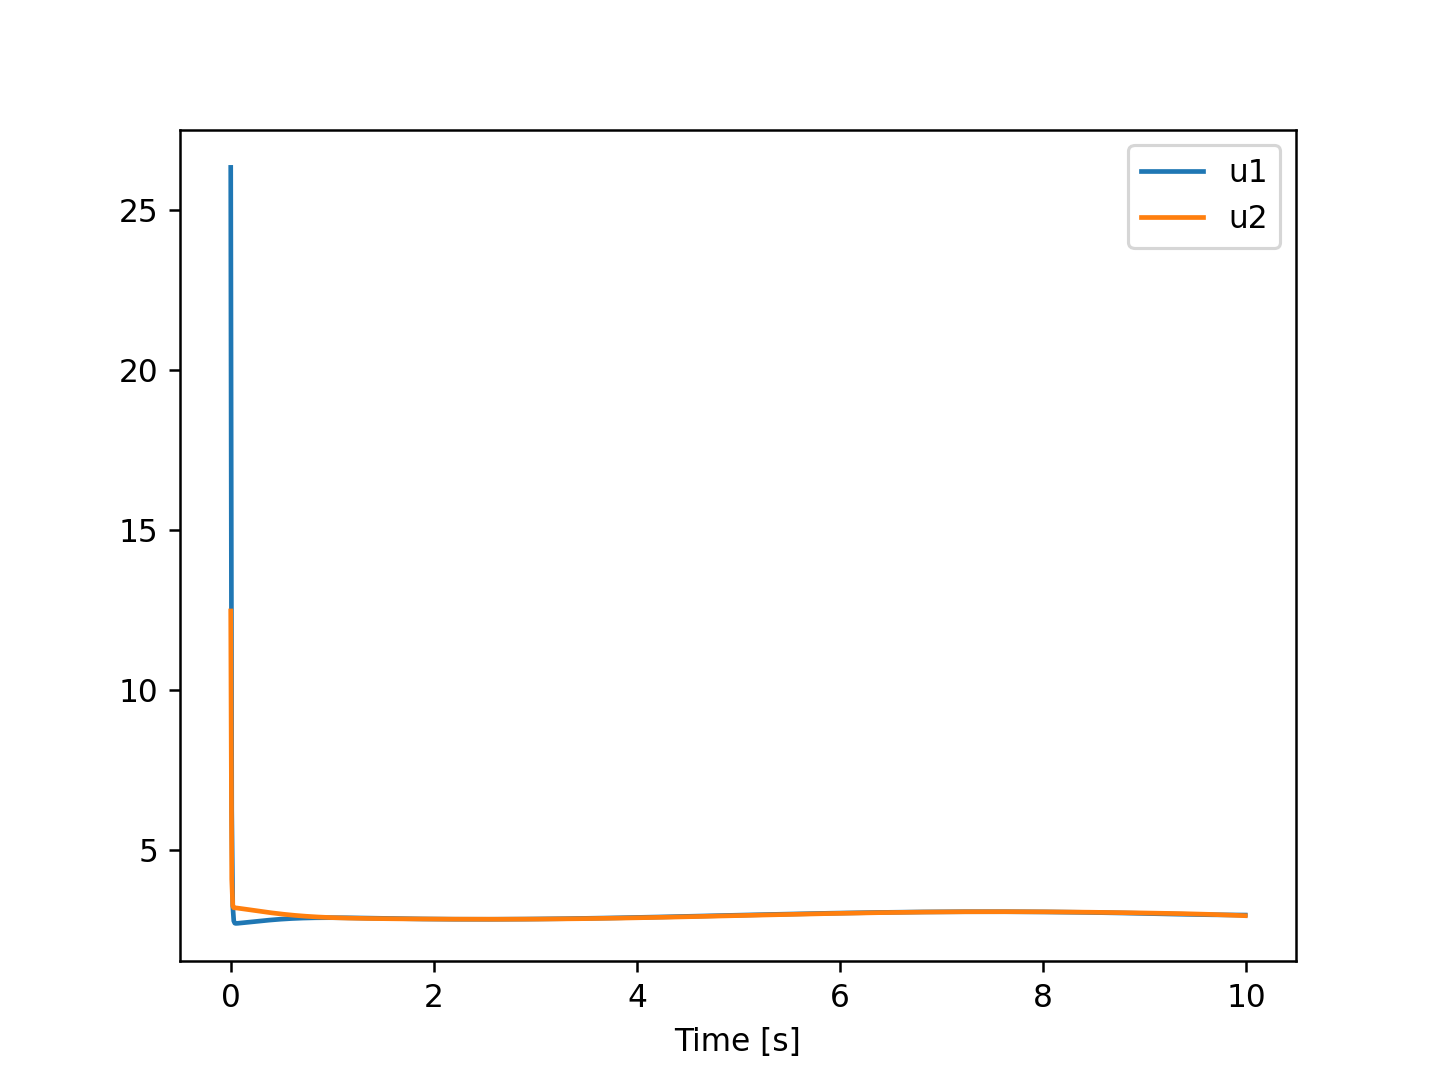

Text(0.5, 0, 'Time [s]')

In [36]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [37]:
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZI5tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EnxliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhmedEfUwaAQY0NNeI9N/r8O7WKv1d/gCdaAl
3Gi81o3z2y10tRWcIK0jjKBVUuThZ+QsHL0juuKYsYerxwqtDlxCDeItdrlLIe68DWXvwKOyDYHE
ScRYU8BCVbYG+CUL9LfBvAFLdMKsx8aFL0gHYcZ1oT+thVmulCoT81aUdXAvNWxJVeFoyHDIqUgd
hcLMjnuFJjpeTkAmyryQvcvS4V4TvwAHwmECX9e+JQ9/0Z+WAeGTsSiZtFgsgBlgUQBbpCIj0eR3
Drxa5PEex3LDD+XAg9NDsxW8cce2l/FR02IVTJaZmpZXtWQ5f3BP8Aty1kv38ceulQsVhdJje6g0
l0Bj6XmjYBLS5p2thXBovCDk56tcwW0pXAmn5ff2hXXmI5Gvc0rDaU9hZI3FzDNi13TNYmkSDf1S
KznomzDwO9GxtcvmIrqffe+QXHegiGfM63XtT7KB/QMexVdErDPgyaKkGf8V+NqvN+yY8/nsjf2E
Fx2m8yY4A20h/nzvxj0JGMLeHi7wr4sf7PBrPmO4yae5/KjSNEhiaznU538Udp/VNSV+3gxYuD9n
ZArTtqPvt4yLz39rF9EoPALtRWEN4d39oavGiY9uez7KFHOitwSyakb+PI3wpb5hosaHKRZsInzk
9Cff7PchFzeLIr7egISomBC9Ve2/Xsxynmmd1ENTAAADAAADAAADAAAE/htllAK04JF28bQCOngz
pQuNUKyt4D5BwwOk5Ie/w8MbGGo+4umc/7XN4xPgITX/v8P4xXK0cnPq8a36oAR/JNEM4+TBapX4
xj+b9wB+V8lwT3O2o56ISGYx3hiQiFC9I9bUAh+/4OliOWN8L6C7/VdZh6DY4QvaPAlCFTRG93VG
QdhJRQP/nWUaBT+q9NwS1xkVOEO5VE3j/5mYHg3MA7ERhmvAovQIhQIO2WQ0ZYKQmfQn8c6UMjwJ
s3aF94dpuhgNv05p8iZFN4bCV4sg4WZXfaTSQ1PNAL7TEkA1RBJAbRyVb3/8isQBpIT5oiDriXZK
Mf9SOmf57XmzKVEgHydyGAYiwNOAu2QDbDC2hmMAMef5U2T78u+ycS1SNKFJjMqZD01HIEL8A1gA
AAMAAAMAAAMAAIQlYu0IohKuThx1qjL/JGT+E4f2mkvM6eHvNVm2otSaeoHfBgQrC8mLn2ZnkAS1
JYv4+Y8mCaJ7t+67tL5JGk/OQ6vXRbMzN61MqB38VseGH7HzixDtGCTmfCOJIpSEHhRJ4R7XhfhY
yerq0cVWRgtgeKXqWmqwkFHBmQ6G9VoB52u9NIzJVUF9xwhInEoGI3GrA8qOmMImNsGWM95Xvz/K
boaigKMl1qVt88fW63QlDs3XI3IM8zkv3unAs+loKA/DH/fIJhU1QEoY8rt4+lq8QSjsiCHDPPgf
sLcNIvpMTlC5NoKpf6dplW1bx9OP4fA9xLOO6MSWS2ZdxUQWnJskRBmGabhOaMTYwHipkPiXFBg6
rbohAjSFoGG0/0SsKHKqG9spq1sljAfkMcUyxLY+xZfXCiol59CHOlQG9OeU5UI1JDizzJ9CmhsL
GXmDjuxmhd//6+lQ9eILp3I2812Nm1i+SxdEr/fREIs6Lq/7c0rQzo/RBCNlS+TNxCRHcsforWdG
vYGfn61kYW/3D7uXn2zPXzdCTO47U4h95BhkJeBlLXsjncdRvjgVSUHF0EI5XJPKKtLGDSAh7cUB
Xhf9tw7deCcOb8RwveFY1JSkU6kvW6lxiuS/kf90PSLqfrJsDMySPoEkUR7JjfiHYk8KWJKPUAAA
AwBFcykABusR4An/Z0lmV5pI+ELLzRhs+/Tv08e/i1RdfvJEuILVS5cIhbVa/xCgR2wpTc0xYeag
DuPWziioVk/fIgOrkX6zzADxl8F3ZIdD2F9+H4Q9a6NBz/qeBaME3A86kAkpemQxqXEeZUBmlF8B
oqzhKcLCZoUB48Fzg+uq0hZRzKqjHinLcLeI7rkI3IYAwDrOfx+gWLtXz4gqmEK5mYjQftSsK6lL
16tgSMsPNI3KMtDovy7U0tPWdKjeTFfbJBOPAjbex2c+c0oG0O6igt78Bgpppc4js4hx47ycT4Lu
gWC054/PRdzVz+2vAW59X7YH/zHMRt3IRcWR4EbnmFIopRwMPM3kV5NuvtPZ/PHnMM6q1ckmcEb2
D5pi/5/60/oQINcl6G5VwCegIcTocp9tPy5CG/c+MClJKKJ62q0QwI6ZmA147ZeVgPEOS7Bi0d3I
fJwdv4FNG48k0/bFuPTMmbXXpdkRnX1/DCzvOyZhnjoxMQex4gVAftLYqQBoyOhZPYDj2lXyvIbo
77rv8TbuGmAQdyvx310kjVoXVCBtpMmwmoIC6jj0DGuUk8mdO14tZZFk9GdE4xnUcA/+vLZ01zgr
ySDcOjYIgHxFQ5ibImLteq1ozGddybsdhdZwL4QEqQCq7ces+lySLX/Lu3jp0gpao1/lT0Ts1ugw
Q7O2vPcruAszK3wjU2ZZBklNHbuDmwSTokiNhqmDfQ3/73T1lNgeRMxhhJxKYbaJI0C8bB+GuC0f
BlgLwaKQlBkIH62BPab5pa0C3DXVVtZMU0TcxKC2YNbz2DBkz3PtPEDFQ2tscVke+tHlbF67b8KP
lciz2AABKzFDYWvMleAAA

<IPython.core.display.Javascript object>


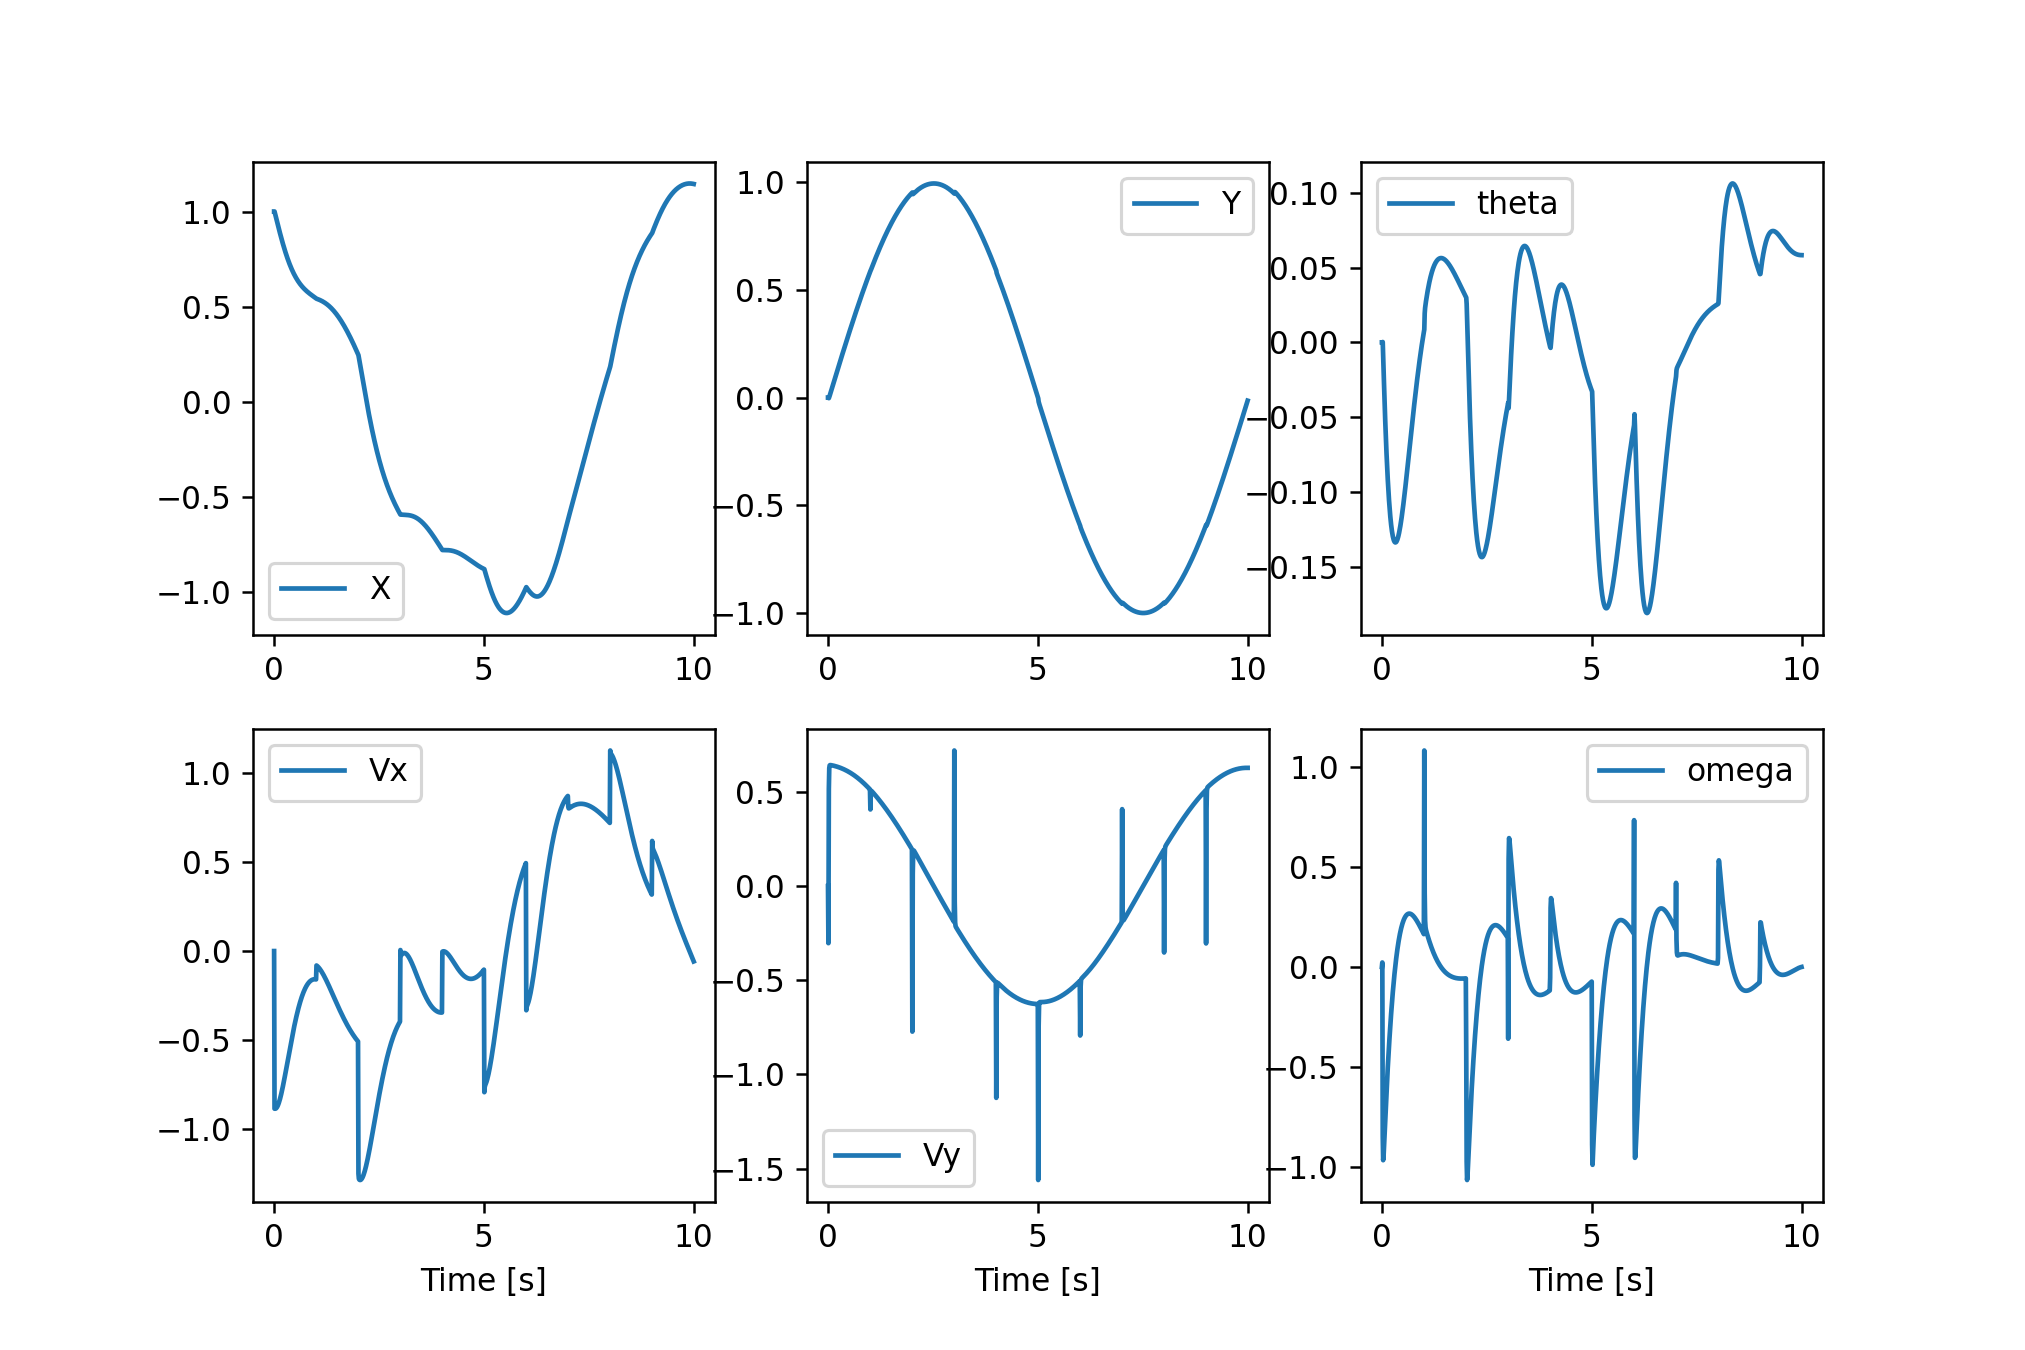

<IPython.core.display.Javascript object>


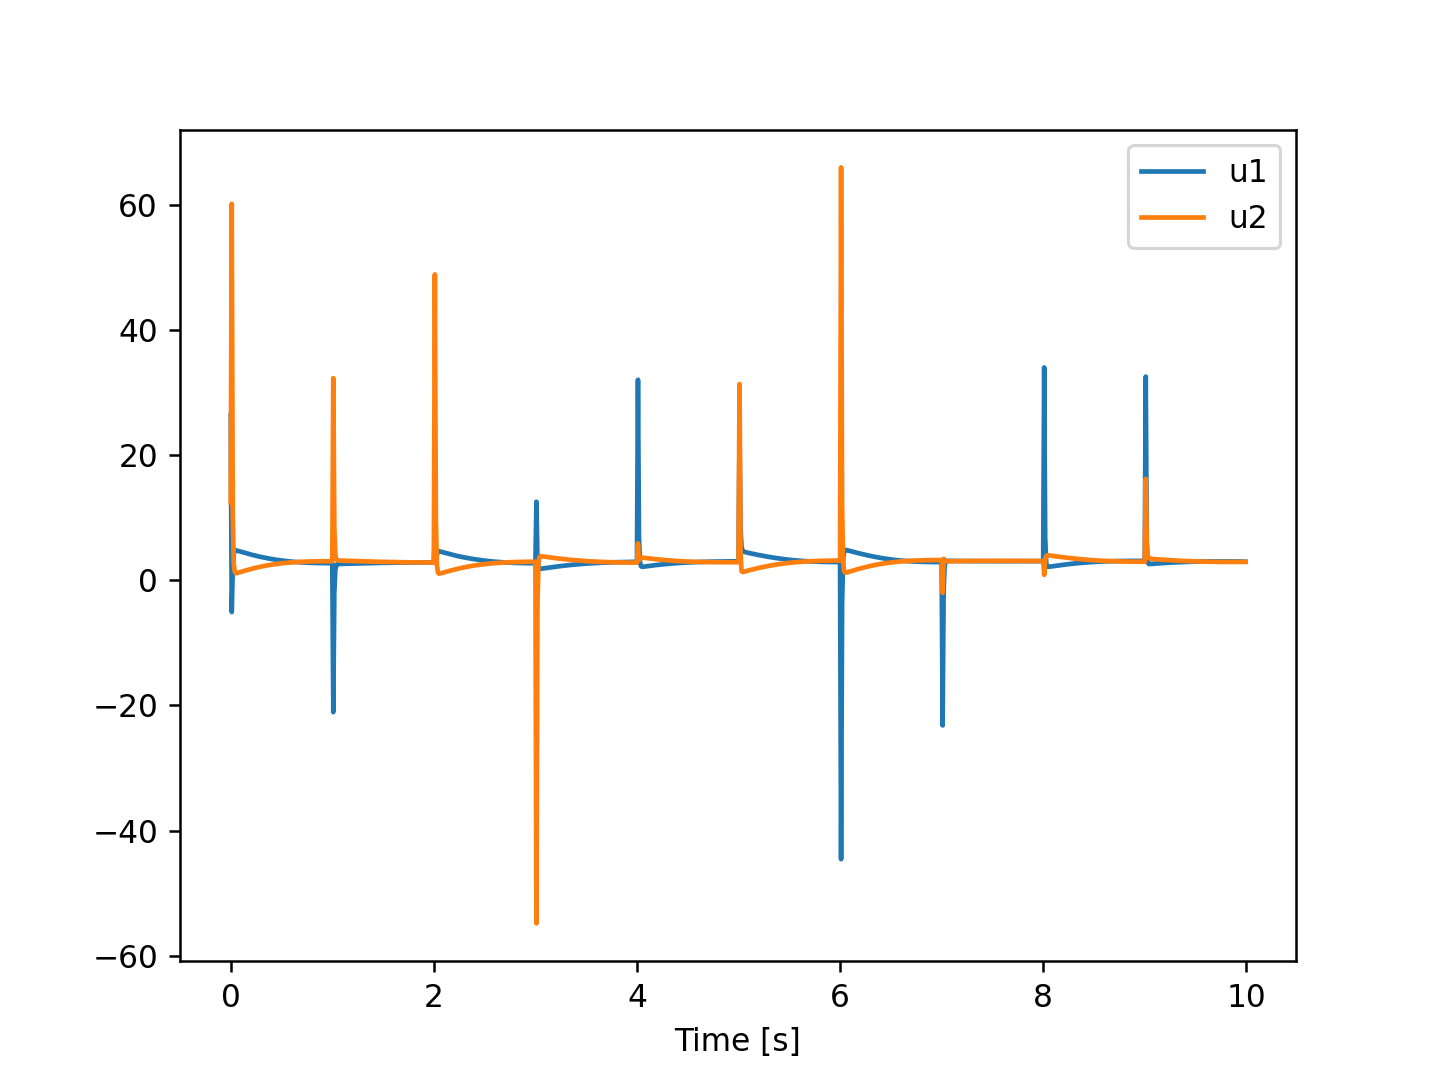

Text(0.5, 0, 'Time [s]')

In [38]:
t, state, u = quadrotor.simulate(z0, part3_controller, horizon_length, disturbance = True)
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')


In [39]:
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAcOttZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EnBliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhoQZvIVAmDgcDuo5PlWD03+vw7tYq99Z+y+b
HyReNFrxo3z2EA4QBJsEFaRxlAqjSg1ElkVWMl5YHFMWMPV44U8/r8e+gYHGjCeClaVZ8BH4FG6Z
WgkicRT6ihsKd1pWWQToCa1wYUa6WxZj1tesogdhxnWhP62FWa6UKhPzVpQlcC8xbElV4WjIcMip
SB2FwsyOe4PjiDFmgCYqvBesO45CMv+ngu8znmfi+LrtH5kvrAP7J2hRM2iwfoA4AKIAt0hER6PI
7h14tcniPY7lhh/LgQemh2YreOOPbS/io6bEKpktMzUsr2rIcv7gn+AW5ayX7+OPXSoWKwukxvdQ
aS6Ax9LzRsAlpc07Wwrg0XhByc9WuYLaUrgTT8vv7QrrzEcjXy6VhtKewskbi5hmxa7pmsTSJBv6
pFZz0TZh4HejY2uXzEVovxVhBJMd9z3rmdbr2p9lA/oGPYquiVhnwZNFUbP+K/G1Xm/ZMefz2Rv7
CC47TeZMcAbaQ/z534x6EjGFvDxd4V8WP9ng1nzHcZNPc/lRb8abVl0D9vzdSr0mzAIN1vlJ4ZAU
3lt4Svs00deGcavubXPZ3roUXg8AugCk/cGfl/0nl6rNoqQMI5686K3BK+otyA8jdEMd9yYWihiY
rlaiHH9BF/qILPy3LLjx63MeXCT7ibY2/XsxynnMa1UNTAAAAwAAAwAAAwAAE/htllAK04L2zu7U
XNPBnShcaoVlbwH/DhgdJyQ9/h4Y2MNP9xdM5/2ubw6fAQmv/f4fxiuVopOfV41v1QAj+SaIZx8Z
J/sin/7NaUWfgHliJYFI6tX7E8JRcFL7dUNCXoW39TuLdu9DK5Gt4DF6f+q80Dcv8DYLe6f0YqaI
3PPA5TsJKKB/86yjQLvwfb4USIZFThDuPpN4/+ZmB4NzAPuUYZrwLbvolsCeXKjGA8dITPoX+OdK
GR4E2btDM3vBiE7hGs6PdkyKbw2ErxZB2sxKe0mkhqeZgXYmJIBqiCSA23bYq1/4FYgDSQnzRcD0
0iNHzZ1I6Z/ntebwpUSAfJ3IZRiLA04C7ZANsM7aGYwAx5/lTZL/1UVThLQY8hhlLFM4cptQe/Xj
48fwAAADAAADAAADAhCVi7ZSiGq5OHHWqMv8kZP4S+qiABz8PearNtRak09QPp8AKjJPOybhRqFs
Zh9EcloLvXpmPpSB2HJAtpGk/OhyvXRbMzN61MqCgWukssJQn3uHCm+NzTPhHEmMpHxlk88I9rwv
wsZPX1aOKfIwWwPFL1LTVYSCjioEXFeq0A87XemkZkqqCtQIQkTh/NzJkLBdsV1GETG2DKo6goLJ
Zw19HCW6Ml1qVNU8fW63QlDs3XI3IM8zkv3unAs91oKA/DH/fJrxU1OvoY8rrwugKVafjsiCHDPP
gfsLcNIiH5XjYmj7xbKOrOTPei7C7krUUw0L+KCivFu3NOTEYEAGBqObq9L0YmxgPFTIfEuKDB1W
3RCBGkLZ6oI/zLdMJ6Ao0FE35qNHJ20h5rFGGr9HgBWKMYxkZ+GRohmWHuzajEr6HFnmT6FNDYWM
vMGk9fibYWol/rBCQe7VlF5Cmuyu/GNbjygYyJLAmKrfR1KsnlBaC/GDazX/31r42XPuYRli3UEB
g/9+0u4vEwtfkohnKA8UK1DjfZ/2wOCFNqJeBlL86jncfsv0yoP6DYAmmmtaRPFWljBpAQ9uKA6P
QBDBTgVjSC8rKXSfu9BHqsM528XBk4bILvof2jTyyTELh5Uw9LRbTbh3CCGo2OkEgAAAAwAUTEBj
LHgYEluxrwOWBAkMz3qwk/lMDV7pSUolcp4vjSKHumbixYWEEtdpCENXfz6NSAJJs6Ml73Mq34zJ
7Xqc2fskp5hFMFtr06IekIqWintpnbn+qBk6BXmWJ1IQ/E2jwULOKXuSOgq64PRupQI6LF42EzW9
7ZSPPj38Kr2ju2SMA/6bFfSzxYl/8Ukeo3/wM0+tJMUKg1MKNwsMlU10o4V1KnjyT5d0uIWB21i0
bQu1NLT1nSpDTVuRH5VnwHzCiRo1d3echhwEsYAZgMFNNLnPpeeM0H7hMdfdWewXQLBac8fp7KIh
qX3FAiMvCYN8ttBUNUjbOkxi9q2KoyGNHI0ehWz86ezHOYsV0sKHTCaLXALPJ8ynevzP41QTjhRp
WJCwsgthtIRGseFCjeNx9RvflxVl85k7aON/BFUprnHMabhTFH49mgrAW5SMtPjfW5Iw0d+v4Kwb
fFD9yI97Jx6AD65LaOvt+CuKs4YTJqkuLX6GoiITo3nKmJ0xlRgtQYplqtzSwx287nfeRnundoRy
wmf/xQbpYYMcg5wMeAGHE0fWnVNGROr3HyMot6uZnhnGrWMckDgr+wZjvMbMc2XiLb5ruNB2NM2B
Z9lBr94YYABLw/Lklx53b65Pb8C3YM5tUawJrqP5vwt+1/avPcruAszKmOfcWQKvZGlqbc1KTe7n
Hbbjktm/ob/+OX9A+KA8NYSp700rHFJcauhuwiU0+oYkAUBB3Dw6Y4b6GK8dKNGl4kK2wMXNrXOy
ZcqDxTZWqf59k9MrTYzENrTJ4R8iAoLRjJxHbTGgkxwM1c2U10+YOAAAAwLPmLPN5N8jVF/UAAAD
AABHjub6TpWk7PySqiw7U

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

<IPython.core.display.Javascript object>


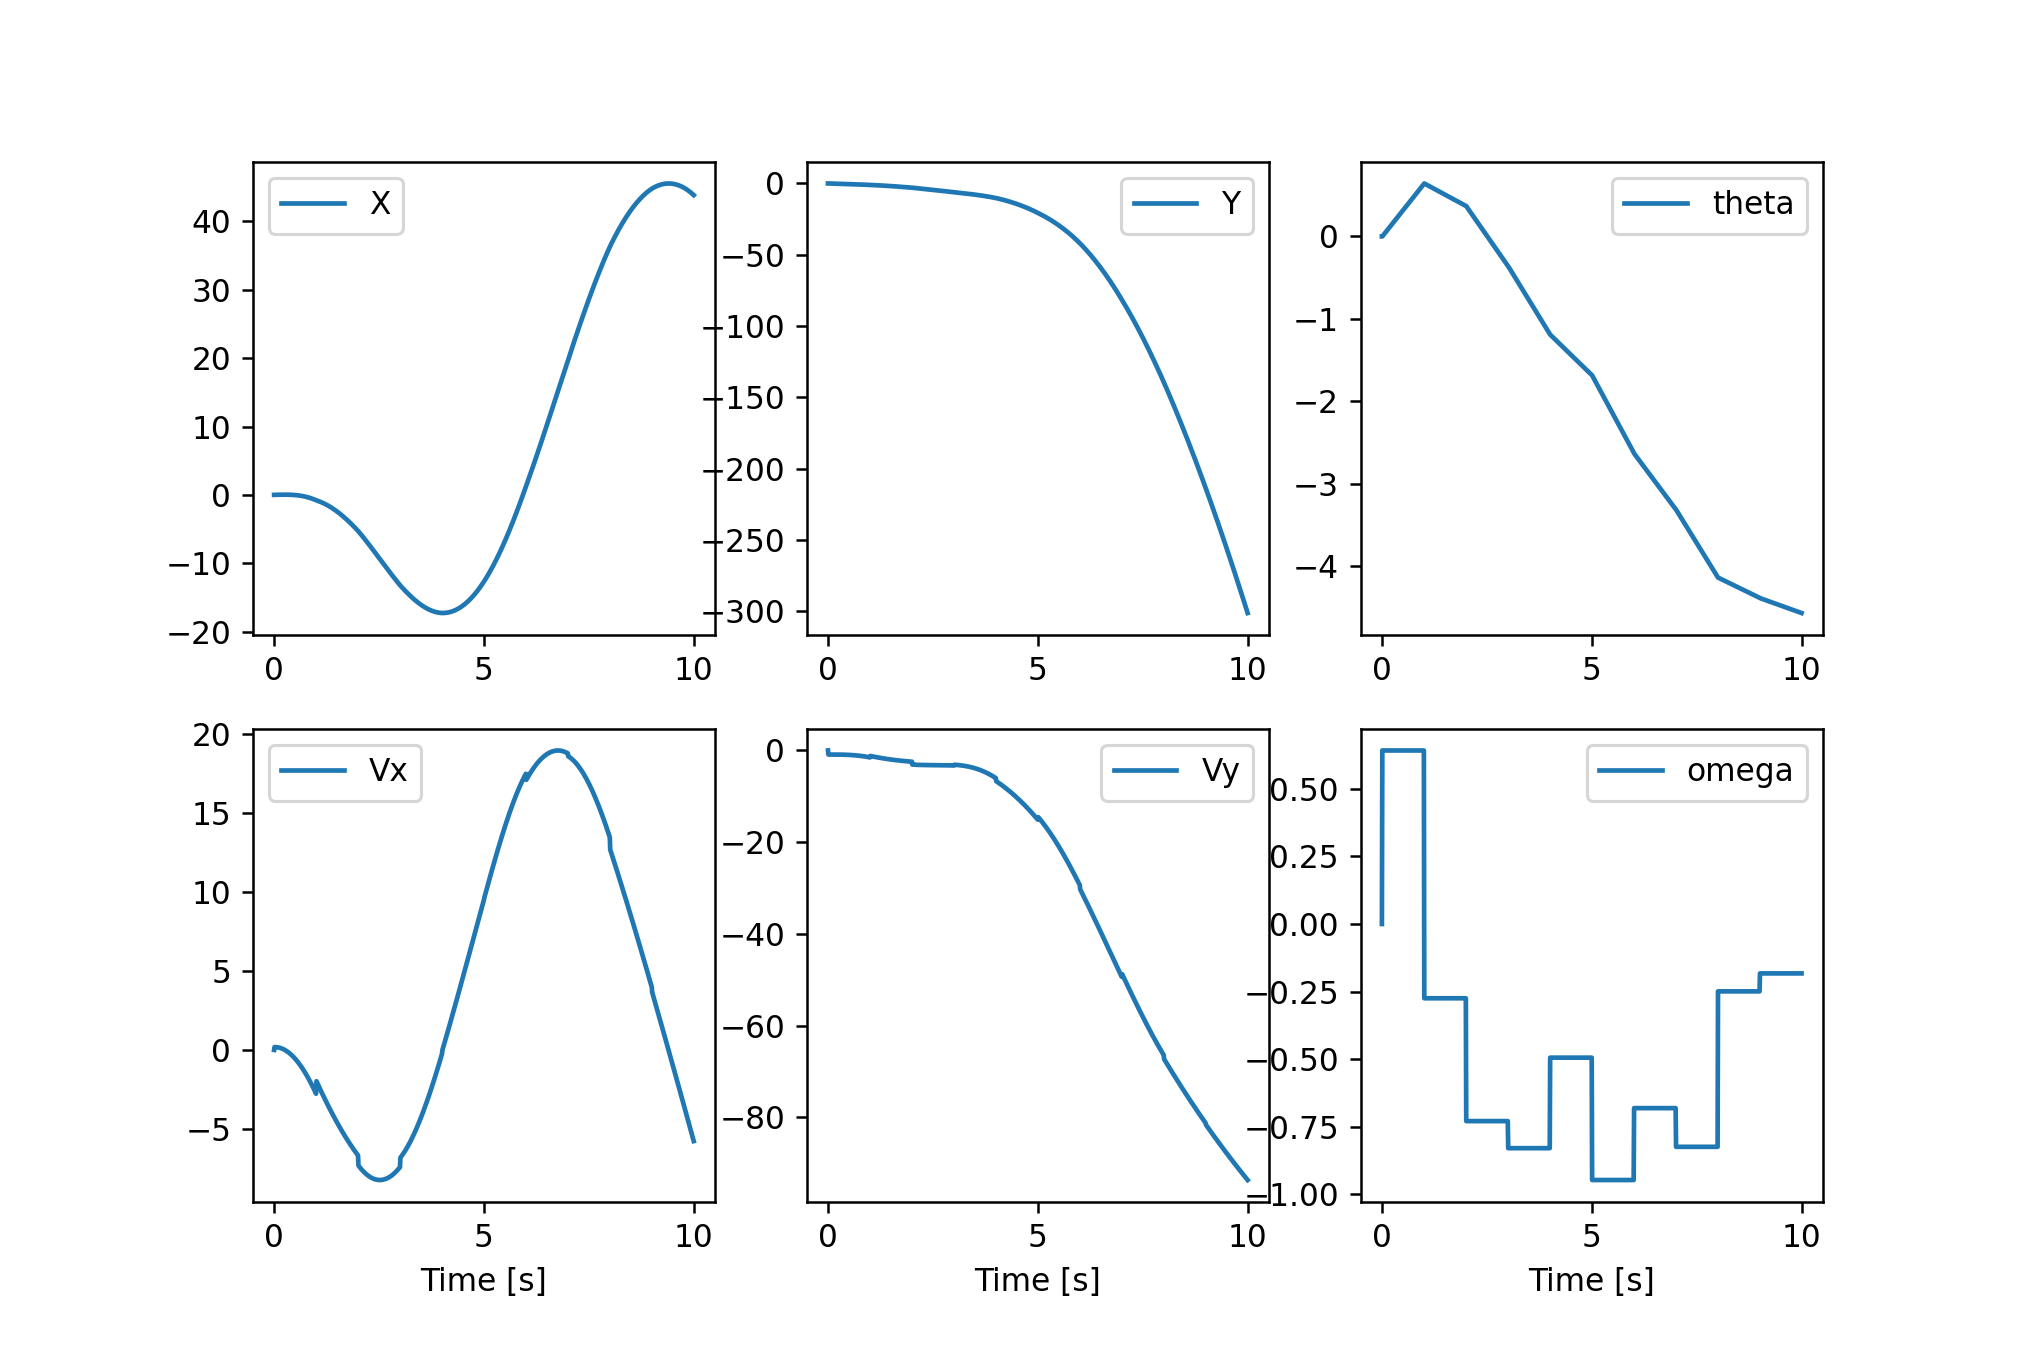

<IPython.core.display.Javascript object>


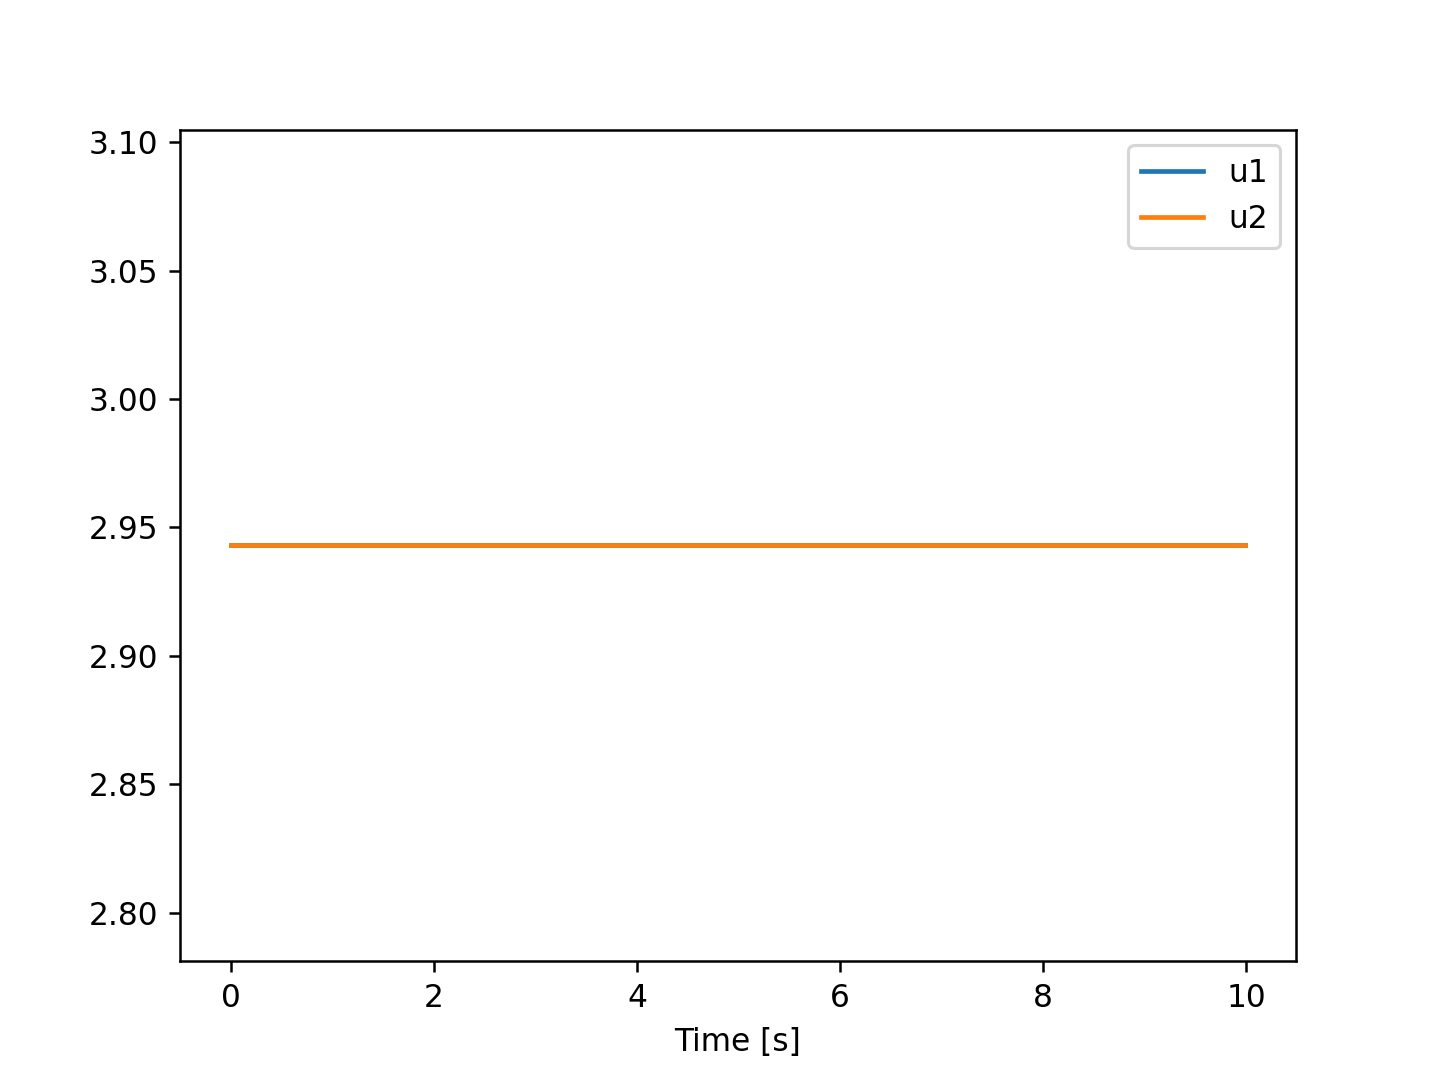

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAONZtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EiBliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhoQZvIVAmDgcDuo5PlWD03+vw7tYq99Z+y+b
HyReNFrxo3z2EA4QBJsEFaRxlAqjSg1ElkVWMl5YHFMWMPV44U8/r8e+gYHGjCeClaVZ8BH4FG6Z
WgkicRT6ihsKd1pWWQToCa1wYUa6WxZj1tesogdhxnWhP62FWa6UKhPzVpQlcC8xbElV4WjIcMip
SB2FwsyOe4PjiDFmgCYqvBesO45CMv+ngu8znmfi+LrtH5kvrAP7J2hRM2iwfoA4AKIAt0hER6PI
7h14tcniPY7lhh/LgQemh2YreOOPbS/io6bEKpktMzUsr2rIcv7gn+AW5ayX7+OPXSoWKwukxvdQ
aS6Ax9LzRsAlpc07Wwrg0XhByc9WuYLaUrgTT8vv7QrrzEcjXy6VhtKewskbi5hmxa7pmsTSJBv6
pFZz0TZh4HejY2uXzEVovxVhBJMd9z3rmdbr2p9lA/oGPYquiVhnwZNFUbP+K/G1Xm/ZMefz2Rv7
CC47TeZMcAbaQ/z534x6EjGFvDxd4V8WP9ng1nzHcZNPc/lRb8abVl0D9vzdSr0mzAIN1vlJ4ZAU
3lt4Svs00deGcavubXPZ3roUXg8AugCk/cGfl/0nl6rNoqQMI5686K3BK+otyA8jdEMd9yYWihiY
rlaiHH9BF/qILPy3LLjx63MeXCT7ibY2/XsxynnMa1UNTAAAAwAAAwAAAwAAE/htllAK04L2zu7U
XNPBnShcaoVlbwH/DhgdJyQ9/h4Y2MNP9xdM5/2ubw6fAQmv/f4fxiuVopOfV41v1QAj+SaIZx8Z
J/sin/7NaUWfgHliJYFI6tX7E8JRcFL7dUNCXoW39TuLdu9DK5Gt4DF6f+q80Dcv8DYLe6f0YqaI
3PPA5TsJKKB/86yjQLvwfb4USIZFThDuPpN4/+ZmB4NzAPuUYZrwLbvolsCeXKjGA8dITPoX+OdK
GR4E2btDM3vBiE7hGs6PdkyKbw2ErxZB2sxKe0mkhqeZgXYmJIBqiCSA23bYq1/4FYgDSQnzRcD0
0iNHzZ1I6Z/ntebwpUSAfJ3IZRiLA04C7ZANsM7aGYwAx5/lTZL/1UVThLQY8hhlLFM4cptQe/Xj
48fwAAADAAADAAADAAMg2xz0zuWPnErO7wfU6Kc8T/+o4EggohmIxcZh4ilgKDRY8mlCp/yuUoeo
0A2eU2dJzfl2Dqpd/fcpVWxRGaPa7J9D6Mrsvy3IX6BtL48Ght+eNPMNIgVh4tFcSoJPTYKBfRZZ
S5kZOUk4tnnlceA+TGETG2CltdAILZJvQjdi2A+CtqX49wWO63QlDs3XGmAR6zYAte653OjO1Fr3
a3UfltDoREHvuNu/iRW5wM3C7W6mK4TlUDRjJGkxNNU02MXMHPtw32T94gbRP2LC4DJ2Mqrt1IQJ
T4370zNPzyTk4x1yR5J4ivv3cNq8hoVzn7ZZvnZQHPfZA1nXNkDVwinF8PFq65KWZCI3QFHE/rrp
4NvjcoPe49Bub2uySu8+ncixWf5JiGmRlaKEyrFUKRTnf9DuOL7iRpirxPu/i9/x3QEI/zOCVtqM
J0kvKzusjoDfs39p1vMpcxPL5pKZQ9ci4XOmHx7mon43dxe23qIXgAAAAwAAAwAAHo2Mv/xkjXAU
F0dsOINJ0jYPsHeqFrHk8pWwWSyIoM72z+MO4IOkgXui67/MR/4p5G/7I72KrxsUPvIOUkEm2/89
Al8cqTrRce7sQn6MLMCADb9AZLPOWzDehkGNhLp8Nb6NkTLLDHV5DdrYampZ/sQ2V0X3MJb0Xi1n
FfSYVIz8gYtih9ktN554l6KNgFTEzKtGu9N23BpOuj6EDD4vtN01s8/Wae6yjI66/lNqqy63DgG2
L4W2kAAcrfeQbPk8a2qJCIzhjKMw79XReGjFUp2s6VJL8L5cDZxPAw5LAjwN87CvLNIK8gGYDBTT
S6aIZfYtf+1fi2lvZc8QmvakRZ/Ls7zLot/yhZiH4+QJTM3XDqgrU/hNYlh+CH739moMnzPmyp3t
IkTe2pySCwzugjxkQ70yZwv9V2rmY029dRdSs+le/FvtdKU4Odjk6tr0EF7Ya1JPyRdOMyJ/S4G8
BOHq9C7/GUUH9KGOxXNFo4BB6gaC1wQ3QqiiOTXDc3jTpT+7wNQ8TI/2PQbu24Fri0zAj6XvC0OV
ABThJZJ6pT5H7IBQ2hBn3Syea/tuL7bfP8yoSMO9KP2qgBn0asf2H+t7cgP1Z4ZfYyYKThGVWYak
wkVZ1IUfG99KNoHi/UL3eDavyUG+TFac7qopw+eMkRHUZYIxs9QYjvid3sZUW77Z0cDHc2bRuRvq
N/IowTlDy4nWvt2IwjFfLdXlKuXoNxY4XFQRAiGlpxF3uPYhoEtqyYbAGESSfum7nCu1j35P/yDw
0njD9LwwsB/WuZNUinkysIsPcTXaGALiVkvqNyg3I+IEgqUV00DIH1YwFMJd7+UL4vY6YojQAB3b
63hnRnhpl98w9rFsAE8Aph+gnMeUIzQ0nGHinRlGAAkG//6SRcAAA1699ysvgl2rzB7vxbshZjlo
sYsoobSkKakk7bZdWs1wd5pyU5Gb+PcDnIn9jxqz7T9oUv6Yjvx7lKugvtG3H9Ht1q8U9mqDScVu
H3NQWF2yorHV+DvZRqEgN

In [9]:
#Task 1


In [ ]:
#Task 2